In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
import geopandas as gpd

**Genereren van de laatste 6 jaren als strings**.

haalt het huidige jaar op en genereert een lijst met de afgelopen 6 jaren.  
Dit wordt gebruikt om data te filteren op recente jaren.


In [3]:
current_year = datetime.datetime.now().year
JAREN = [str(jaar) for jaar in range(current_year - 6, current_year )]
print(JAREN)

['2019', '2020', '2021', '2022', '2023', '2024']


In [4]:
def laad_en_filter_data(pad, jaren):
    """
    Deze functie laadt een Excel-bestand in, selecteert specifieke tabbladen
    op basis van de opgegeven lijst met jaren, en combineert de data tot één Pandas DataFrame.

    Parameters:
    pad (str): Het pad naar het Excel-bestand.
    jaren (list): Een lijst met tabbladnamen (jaartallen) die moeten worden ingeladen.

    Returns:
    pd.DataFrame: Een Pandas DataFrame die de gecombineerde data van de geselecteerde tabbladen bevat.
    """
    data = pd.read_excel(pad, sheet_name= None)
    selectie_data = {jaar: data[jaar] for jaar in jaren}
    print("laden is gelukt")
    return pd.concat(selectie_data.values(),  ignore_index=True)

pad = "data/dataset vastgoed_2010_2024.xlsx"
dataset = laad_en_filter_data(pad, JAREN)


laden is gelukt


In [5]:
dataset.head()

,CD_YEAR,CD_TYPE_NL,CD_TYPE_FR,CD_REFNIS,CD_REFNIS_NL,CD_REFNIS_FR,CD_PERIOD,CD_CLASS_SURFACE,MS_TOTAL_TRANSACTIONS,MS_P_25,MS_P_50_median,MS_P_75,CD_niveau_refnis
0,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q1,totaal / total,14978.0,148000.0,205000.0,280000.0,1
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q2,totaal / total,16559.0,144000.0,200000.0,280000.0,1
2,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q3,totaal / total,16486.0,152000.0,215000.0,290000.0,1
3,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q4,totaal / total,24856.0,161000.0,223900.0,299000.0,1
4,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,S1,totaal / total,31537.0,145000.0,200000.0,280000.0,1


**Hernoemen kolommen**
  
Ik kies vaste kolomnamen en hernoem de kolomnamen via een functie.

Ik voeg een kolom toe met period type in deze functie met waarden Kwartaal, Semester en Jaar

In [6]:
nieuwe_kolomnamen = {'CD_YEAR': 'Jaar', 
                     'CD_TYPE_NL': 'Woningtype_NL', 
                     'CD_TYPE_FR': 'Woningtype_FR', 
                     'CD_REFNIS': 'NIS-code', 
                     'CD_REFNIS_NL': 'Naam_NL', 
                     'CD_REFNIS_FR': 'Naam_FR', 
                     'CD_PERIOD': 'Periode', 
                     'MS_TOTAL_TRANSACTIONS': 'Aantal_transacties', 
                     'MS_P_25':'Prijs_25e_Percentiel', 
                     'MS_P_50_median': 'Prijs_50e_Percentiel', 
                     'MS_P_75': 'Prijs_75e_Percentiel', 
                     'CD_niveau_refnis': 'Geografisch_Niveau'}



def hernoem_kolomnamen(dataset):
    dataset.rename(columns = nieuwe_kolomnamen, inplace = True)
    dataset['periode_type'] = dataset['Periode'].map(lambda x: "Jaar" if x == 'Y' else 'Kwartaal' if x.startswith("Q") else "Semester" )
    return dataset

hernoem_kolomnamen(dataset)
dataset.head()



,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
0,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q1,totaal / total,14978.0,148000.0,205000.0,280000.0,1,Kwartaal
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q2,totaal / total,16559.0,144000.0,200000.0,280000.0,1,Kwartaal
2,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q3,totaal / total,16486.0,152000.0,215000.0,290000.0,1,Kwartaal
3,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q4,totaal / total,24856.0,161000.0,223900.0,299000.0,1,Kwartaal
4,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,S1,totaal / total,31537.0,145000.0,200000.0,280000.0,1,Semester


**Maak een bestand df om de originele dataset te behouden + verzamel informatie over de dataset**
    
maak een copy van de dataset om op te werken
    
een functie die de nodige informatie verzameld over de dataset:

- eerste 10 rijen
- info()
- output van describe in een variabel stats
- info over missing values
    
de functie retourneert ook al die waardes in variabelen voor later gebruik

Ik maak een df bestand aan en slaag de resultaten van de inspect functie op in result

In [7]:
def create_df(dataset):
    df = dataset.copy()
    return df

def inspect_df(df):
    if df.empty:
        print("De dataset is leeg.")
        return None
    else:
        print(f"Eerste 10 rijen")
        display(df.head(10))
        print(f"Informatie over de dataset:")
        df.info()
        stats = pd.DataFrame(df.describe(include = "all"))
        missing_values = df.isnull().sum()
        missing_percentage = (missing_values/len(df)*100).round(2)
        missing_stats = pd.DataFrame({"missing_values" : missing_values, "missing_percentage": missing_percentage})
        print(f"Samenvattende statistieken:")
        display(stats)
        display(missing_stats)
        return {"stats": stats, "missing_values": missing_values, "missing_percentage": missing_percentage, "missing_stats": missing_stats}

df = create_df(dataset)
result = inspect_df(df)


Eerste 10 rijen


,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
0,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q1,totaal / total,14978.0,148000.0,205000.0,280000.0,1,Kwartaal
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q2,totaal / total,16559.0,144000.0,200000.0,280000.0,1,Kwartaal
2,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q3,totaal / total,16486.0,152000.0,215000.0,290000.0,1,Kwartaal
3,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q4,totaal / total,24856.0,161000.0,223900.0,299000.0,1,Kwartaal
4,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,S1,totaal / total,31537.0,145000.0,200000.0,280000.0,1,Semester
5,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,S2,totaal / total,41342.0,159500.0,220000.0,295000.0,1,Semester
6,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Y,totaal / total,72879.0,150000.0,215000.0,289000.0,1,Jaar
7,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,2000,VLAAMS GEWEST,REGION FLAMANDE,Q1,totaal / total,9682.0,175000.0,230000.0,295000.0,2,Kwartaal
8,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,2000,VLAAMS GEWEST,REGION FLAMANDE,Q2,totaal / total,10511.0,175000.0,232000.0,299000.0,2,Kwartaal
9,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,2000,VLAAMS GEWEST,REGION FLAMANDE,Q3,totaal / total,10531.0,182500.0,240000.0,309000.0,2,Kwartaal


Informatie over de dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99528 entries, 0 to 99527
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jaar                  99528 non-null  int64  
 1   Woningtype_NL         99528 non-null  object 
 2   Woningtype_FR         99528 non-null  object 
 3   NIS-code              99528 non-null  int64  
 4   Naam_NL               99528 non-null  object 
 5   Naam_FR               99528 non-null  object 
 6   Periode               99528 non-null  object 
 7   CD_CLASS_SURFACE      99528 non-null  object 
 8   Aantal_transacties    94747 non-null  float64
 9   Prijs_25e_Percentiel  54951 non-null  float64
 10  Prijs_50e_Percentiel  54951 non-null  float64
 11  Prijs_75e_Percentiel  54951 non-null  float64
 12  Geografisch_Niveau    99528 non-null  int64  
 13  periode_type          99528 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory 

,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
count,99528.000000,99528,99528,99528.000000,99528,99528,99528,99528,94747.000000,5.495100e+04,5.495100e+04,5.495100e+04,99528.000000,99528
unique,NaN,4,4,NaN,638,637,7,1,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,NaN,VIROINVAL,SAINT-NICOLAS,Q1,totaal / total,NaN,NaN,NaN,NaN,NaN,Kwartaal
freq,NaN,24882,24882,NaN,156,312,15312,99528,NaN,NaN,NaN,NaN,NaN,58696
mean,2021.307692,NaN,NaN,47174.390282,NaN,NaN,NaN,NaN,197.115803,2.121989e+05,2.763576e+05,3.576688e+05,4.880878,NaN
std,1.619661,NaN,NaN,24430.997173,NaN,NaN,NaN,NaN,1622.865864,8.922584e+04,1.142701e+05,1.637533e+05,0.428140,NaN
min,2019.000000,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,1.000000,1.625000e+04,3.000000e+04,5.100000e+04,1.000000,NaN
25%,2020.000000,NaN,NaN,24107.000000,NaN,NaN,NaN,NaN,9.000000,1.550000e+05,2.000000e+05,2.628750e+05,5.000000,NaN
50%,2021.000000,NaN,NaN,45059.500000,NaN,NaN,NaN,NaN,22.000000,1.975000e+05,2.570000e+05,3.300000e+05,5.000000,NaN
75%,2023.000000,NaN,NaN,63079.000000,NaN,NaN,NaN,NaN,59.000000,2.550000e+05,3.250000e+05,4.100000e+05,5.000000,NaN


,missing_values,missing_percentage
Jaar,0,0.00
Woningtype_NL,0,0.00
Woningtype_FR,0,0.00
NIS-code,0,0.00
Naam_NL,0,0.00
Naam_FR,0,0.00
Periode,0,0.00
CD_CLASS_SURFACE,0,0.00
Aantal_transacties,4781,4.80
Prijs_25e_Percentiel,44577,44.79


**Boxplot van de numerieke kolommen**

Ik maak een boxplot van de numerieke kolommen om de spreiding van de data te bekijken en te kijken waar er outliers zijn.

Index(['Jaar', 'NIS-code', 'Aantal_transacties', 'Prijs_25e_Percentiel',
       'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel', 'Geografisch_Niveau'],
      dtype='object')


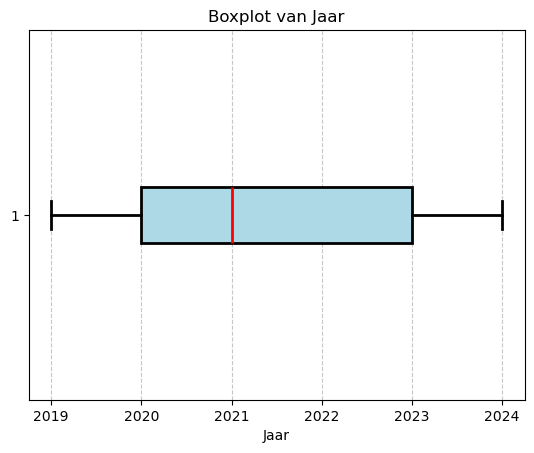

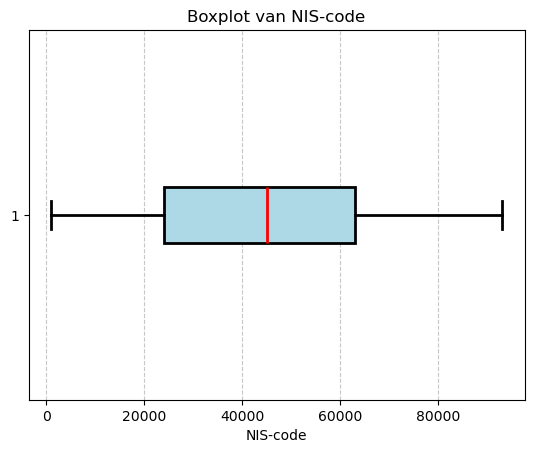

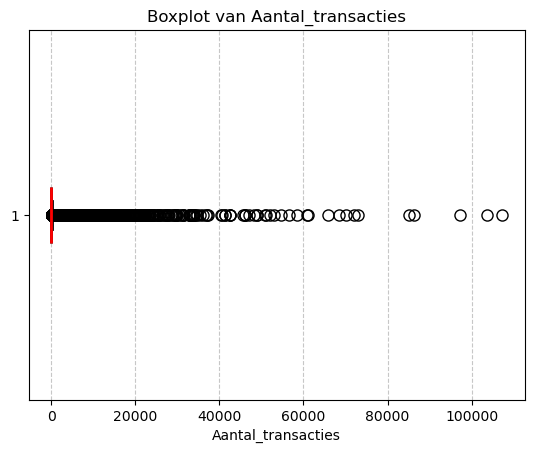

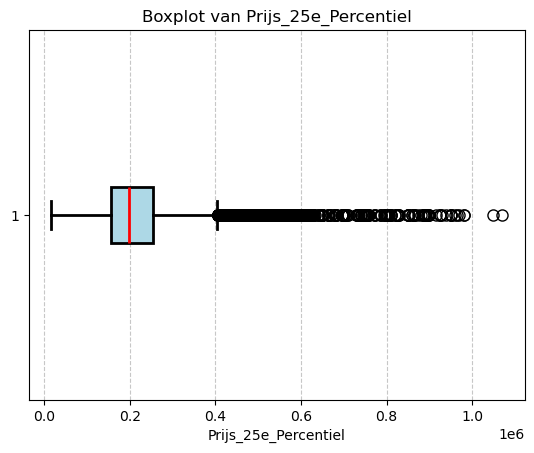

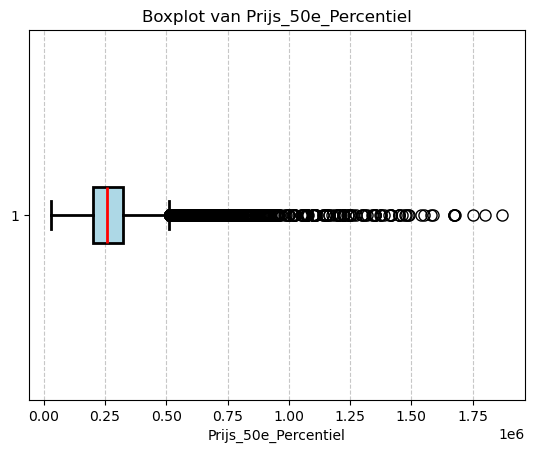

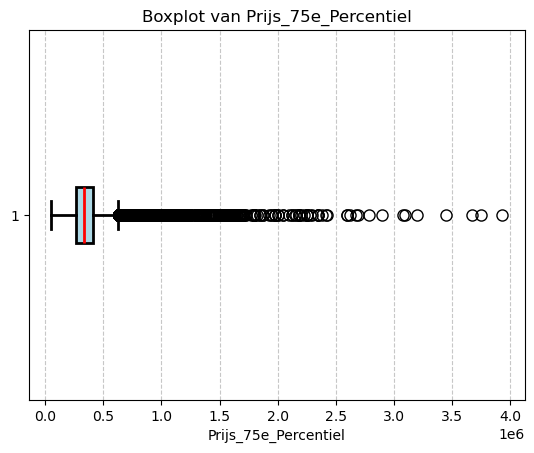

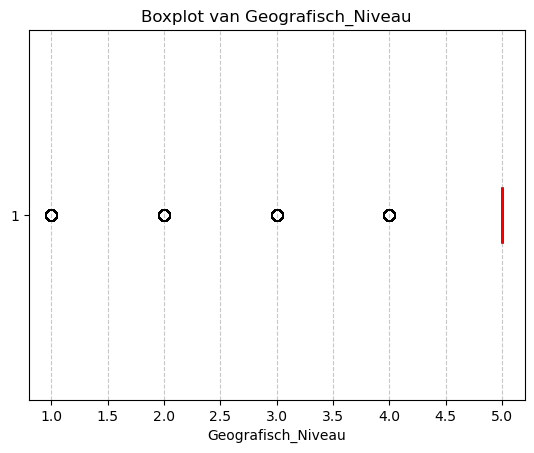

In [8]:
def create_boxplot(df, kolom):
    fig, ax = plt.subplots()
    ax.boxplot(df[kolom].dropna(), vert = False, patch_artist = True,
          boxprops = dict(facecolor = 'lightblue', color = 'black', linewidth = 2),
          medianprops = dict(color = 'red', linewidth = 2),
          whiskerprops = dict(color = 'black', linewidth = 2),
          capprops = dict(color = 'black', linewidth = 2),
          flierprops = dict(marker = 'o', color = 'red', markersize = 8))
    ax.set_title(f'Boxplot van {kolom}')
    ax.set_xlabel(f'{kolom}')
    ax.xaxis.grid(True, linestyle = '--', alpha = 0.7)
    plt.show()

numerieke_kolommen = df.select_dtypes(include = 'number').columns
print(numerieke_kolommen)
for col in numerieke_kolommen:
    create_boxplot(df, col)

In [9]:
def check_outliers(df, kolom):
    q1 = np.percentile(df[kolom].dropna(), 25)
    q3 = np.percentile(df[kolom].dropna(), 75)
    iqr = q3 -q1
    lower_bound = q1 - 1.5 *iqr
    upper_bound = q3 + 1.5 *iqr
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    return outliers

print(check_outliers(df, 'Prijs_25e_Percentiel').shape)
print(check_outliers(df, 'Prijs_50e_Percentiel').shape)
print(check_outliers(df, 'Prijs_75e_Percentiel').shape)

outliers_25_before = check_outliers(df, 'Prijs_25e_Percentiel')
outliers_50_before = check_outliers(df, 'Prijs_50e_Percentiel')
outliers_75_before = check_outliers(df, 'Prijs_75e_Percentiel')
print(outliers_25_before.index)
print(outliers_50_before.index)
print(outliers_75_before.index)


(1654, 14)
(1733, 14)
(2404, 14)
Index([  589,   616,   617,   618,   619,   620,   621,   622,   667,   674,
       ...
       95177, 95178, 95179, 95244, 95246, 95247, 95660, 95661, 95662, 95663],
      dtype='int64', length=1654)
Index([  589,   592,   593,   594,   603,   616,   617,   618,   619,   620,
       ...
       95247, 95569, 95660, 95661, 95662, 95663, 97796, 97797, 97798, 97799],
      dtype='int64', length=1733)
Index([  588,   589,   592,   593,   594,   602,   603,   606,   608,   616,
       ...
       95247, 95569, 95660, 95661, 95662, 95663, 97796, 97797, 97798, 97799],
      dtype='int64', length=2404)


**Visuele voorstelling van de missing values**

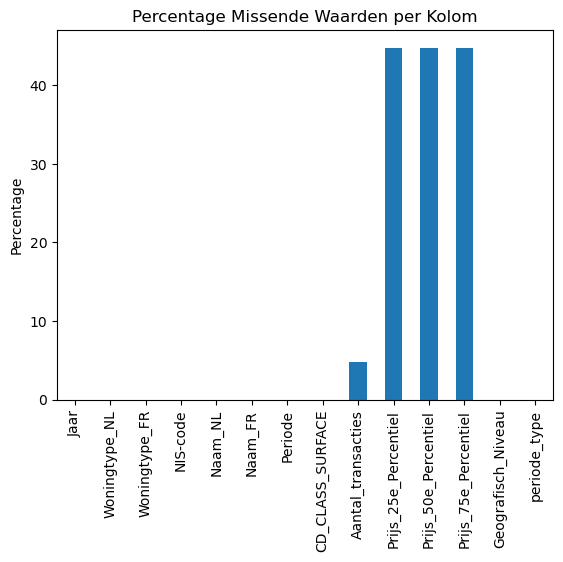

In [10]:
def visual_missing_percentage(result):
    missing_percentage = result["missing_percentage"]
    #missing_percentage_filterd = missing_percentage[missing_percentage > 0]
    #missing_percentage_filterd.plot(kind = "bar", rot = 30)
    missing_percentage.plot(kind = "bar", rot = 90)
    plt.title("Percentage Missende Waarden per Kolom")
    plt.ylabel("Percentage")
    plt.show()
visual_missing_percentage(result)



**Onderzoeken Missing Values**

We hebben informatie over de missing values in variabele result

In [11]:
#Onderzoeken missing_values
print(result["missing_values"])

Jaar                        0
Woningtype_NL               0
Woningtype_FR               0
NIS-code                    0
Naam_NL                     0
Naam_FR                     0
Periode                     0
CD_CLASS_SURFACE            0
Aantal_transacties       4781
Prijs_25e_Percentiel    44577
Prijs_50e_Percentiel    44577
Prijs_75e_Percentiel    44577
Geografisch_Niveau          0
periode_type                0
dtype: int64


**Uitzoeken waar de missing values voorkomen**

De visual 'Percentage Missende Waarden per Kolom' toont dat de missing values zich voordoen in de kolommen Prijs_25e_Percentiel, Prijs_50e_Percentiel en Prijs_75e_Percentiel.

Groeperen op jaar en periode om na te gaan of er specifieke periodes zijn met meer missende data
- De dataset wordt gegroepeerd per Jaar en Periode.
- Het aantal missende waarden wordt per groep berekend.
- Een pivot-table wordt gebruikt om de data te structureren voor visualisatie.
- Een heatmap toont waar de ontbrekende waarden zich bevinden.



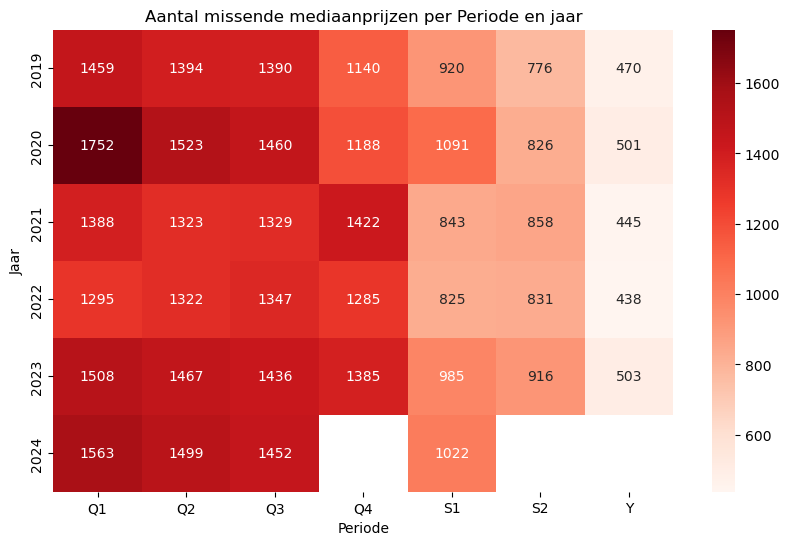

In [12]:
def heatmap_missing_values_period_year(df):
    if "Prijs_50e_Percentiel" not in df.columns:
        print("Fout: De kolom 'Prijs_50e_Percentiel' ontbreekt in de dataset. Visual niet mogelijk")
        return
    missing_data = df.groupby(["Jaar", "Periode"])[["Prijs_25e_Percentiel", "Prijs_50e_Percentiel", "Prijs_75e_Percentiel"]].apply(lambda x : x.isnull().sum()).reset_index()
    missing_pivot = missing_data.pivot(index = "Jaar", columns = "Periode", values = "Prijs_50e_Percentiel")  
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_pivot, cmap='Reds', annot=True, fmt='g')
    plt.title("Aantal missende mediaanprijzen per Periode en jaar")
    plt.xlabel("Periode")
    plt.ylabel("Jaar")
    plt.show()

heatmap_missing_values_period_year(df)

**Missende waardes per periode type**

Vanuit de heatmap zien we dat de meeste missende waardes zich voordoen in de kwartalen en dat er voor 2024 Q4, S2 en Y helemaal geen waardes zijn.

Ik maak een groepering missing per period type om dit te controleren

De functie  berekent het aantal missende waardes per periode type.

Parameters: 
- df(de dataset)
- columns (list, optional): Lijst met kolommen waarvoor missende waarden moeten worden geanalyseerd.
                              Standaard wordt gekeken naar prijspercentielen.

Returns:
- DataFrame met aantal missende waarden per periode-type.

In [13]:
def missing_per_periode_type(df, columns = None):
    if columns is None:
        columns = ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']
        return df.groupby(['periode_type'])[columns].apply(lambda x: x.isnull().sum())


missing_per_periode_type_full_dataset = missing_per_periode_type(df)    
    
print(missing_per_periode_type_full_dataset)

              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                          2357                  2357                  2357
Kwartaal                     32327                 32327                 32327
Semester                      9893                  9893                  9893


In [14]:
df.loc[(df["periode_type"] == "Kwartaal") & (df["Jaar"] == 2024) & (df["Naam_NL"] == "BOECHOUT"), ["Jaar","Periode","Naam_NL", "Prijs_25e_Percentiel", "Prijs_50e_Percentiel", "Prijs_75e_Percentiel"]]

,Jaar,Periode,Naam_NL,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel
89352,2024,Q1,BOECHOUT,NaN,NaN,NaN
89353,2024,Q2,BOECHOUT,NaN,NaN,NaN
89354,2024,Q3,BOECHOUT,NaN,NaN,NaN
91904,2024,Q1,BOECHOUT,NaN,NaN,NaN
91905,2024,Q2,BOECHOUT,NaN,NaN,NaN
91906,2024,Q3,BOECHOUT,NaN,NaN,NaN
94456,2024,Q1,BOECHOUT,NaN,NaN,NaN
94457,2024,Q2,BOECHOUT,300000.0,443750.0,585000.0
94458,2024,Q3,BOECHOUT,467500.0,560000.0,625000.0
97008,2024,Q1,BOECHOUT,NaN,NaN,NaN


**Onderzoeken of forward_fill en backward_fill een goede methode zou zijn om missende waardes te behandelen**

Waarom deze methode?
- Dataset bestaat uit mediaanprijzen dus minder gevoelig voor uitschieters
- Werken binnen gemeente, periode type, jaar en woningtype omdat prijzen daarin vaken consistent blijven
- Deze methodes zullen de missing values opvullen maar geen grote sprongen veroorzaken.

Test op gemeente Boechout in 2023 op de kwartalen



In [15]:
missing_combinations = df.groupby(["Naam_NL", "Jaar", "Periode", "Woningtype_NL"])[["Prijs_25e_Percentiel", "Prijs_50e_Percentiel", "Prijs_75e_Percentiel"]].apply(lambda x: x.isnull().all())
missing_combinations = missing_combinations[missing_combinations].reset_index()
missing_combinations.to_excel("missing_combinations.xlsx", index=False)


In [16]:
#Tel de missende waarden per combinatie van jaar, woningtype en periode
missing_summary = df.groupby([ 'Jaar', 'Periode', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].apply(lambda x: x.isnull().sum())

#Toon de samenvatting
#print(missing_summary)

missing_summary.to_excel("missing_summary.xlsx")


In [17]:
#Maak een kopie van de dataset om de originele data niet te wijzigen
df_work = df.copy()
#Optioneel: exporteer de dataset naar Excel voor inspectie
#df_work.to_excel("df_work.xlsx", index=False)

#Filter de dataset op:
#- Gemeente: "BOECHOUT"
#- Periode-type: "Kwartaal"
#- Jaar: 2023
df_filterd = df_work[
     (df_work["Naam_NL"] == "BOECHOUT") & 
     (df_work["periode_type"] == "Kwartaal") & 
     (df_work["Jaar"] == 2023)].copy()

#Optioneel: Bekijk de eerste rijen van de gefilterde dataset
#print(df_filterd)
#print(df_filterd.info())

#Controleer de index van de gefilterde dataset
print(df_filterd.index)

#Pas forward-fill en backward-fill toe op de mediaanprijzen binnen elke groep.
df_filterd.loc[:, ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']] = (
    df_filterd.groupby(['Naam_NL', 'Jaar', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].transform(lambda group: group.ffill().bfill()))
print(df_filterd)




Index([71512, 71513, 71514, 71515, 75978, 75979, 75980, 75981, 80444, 80445,
       80446, 80447, 84910, 84911, 84912, 84913],
      dtype='int64')
       Jaar                                      Woningtype_NL  \
71512  2023  Huizen met 2 of 3 gevels (gesloten + halfopen ...   
71513  2023  Huizen met 2 of 3 gevels (gesloten + halfopen ...   
71514  2023  Huizen met 2 of 3 gevels (gesloten + halfopen ...   
71515  2023  Huizen met 2 of 3 gevels (gesloten + halfopen ...   
75978  2023       Huizen met 4 of meer gevels (open bebouwing)   
75979  2023       Huizen met 4 of meer gevels (open bebouwing)   
75980  2023       Huizen met 4 of meer gevels (open bebouwing)   
75981  2023       Huizen met 4 of meer gevels (open bebouwing)   
80444  2023  Alle huizen met 2, 3, 4 of meer gevels (excl. ...   
80445  2023  Alle huizen met 2, 3, 4 of meer gevels (excl. ...   
80446  2023  Alle huizen met 2, 3, 4 of meer gevels (excl. ...   
80447  2023  Alle huizen met 2, 3, 4 of meer gevels (excl. .

**Nieuwe df_filterd met het testresultaat Boechout naar excel**

In [18]:
df_filterd.to_excel("df_filterd.xlsx", index=False)

**Dataset beperken tot het arrondisement Mechelen + Zemst**

Ik ben alleen geïnteresseerd in het arrondissement Mechelen en de gemeente Zemst.

Daarom filter ik de dataset zodat alleen de volgende gemeenten overblijven:
- Berlaar, Bonheiden, Bornem, Duffel, Heist-op-den-Berg
- Lier, Mechelen, Nijlen, Putte, Puurs-Sint-Amands
- Sint-Katelijne-Waver, Willebroek, Zemst

Hierna bekijk ik opnieuw de dataset met de functies inspect_df en visual_missing_percentage om na te gaan of de missende waardes nu onder de 40% liggen.

Bij teveel missende waardes kan forward-fill en backward-fill verkeerde trends suggereren.

Als het percentage missende waarden onder de 40% blijft, is het opvullen statistisch betrouwbaarder.

In [19]:
#Filteren van de dataset
gemeenten_mechelen = [
    'Berlaar', 'Bonheiden', 'Bornem', 'Duffel', 'Heist-op-den-Berg',
    'Lier', 'Mechelen', 'Nijlen', 'Putte', 'Puurs-Sint-Amands',
    'Sint-Katelijne-Waver', 'Willebroek', 'Zemst'
]
#lijst gemeenten overzetten in upper case zodat ik kan filteren
gemeenten_mechelen = [gemeente.upper() for gemeente in gemeenten_mechelen]

df_mechelen = df[df['Naam_NL'].isin(gemeenten_mechelen)].copy()
print(df_mechelen['Naam_NL'].unique())

['BERLAAR' 'BONHEIDEN' 'BORNEM' 'DUFFEL' 'HEIST-OP-DEN-BERG' 'LIER'
 'MECHELEN' 'NIJLEN' 'PUTTE' 'SINT-KATELIJNE-WAVER' 'WILLEBROEK'
 'PUURS-SINT-AMANDS' 'ZEMST']


In [20]:
df_mechelen_no_fill = df_mechelen.copy()

Eerste 10 rijen


,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
259,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q1,totaal / total,15.0,NaN,NaN,NaN,5,Kwartaal
260,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q2,totaal / total,16.0,185750.0,285000.0,332500.0,5,Kwartaal
261,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q3,totaal / total,14.0,NaN,NaN,NaN,5,Kwartaal
262,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q4,totaal / total,37.0,200000.0,232000.0,289000.0,5,Kwartaal
263,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,S1,totaal / total,31.0,159000.0,235000.0,305000.0,5,Semester
264,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,S2,totaal / total,51.0,189000.0,220000.0,289000.0,5,Semester
265,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Y,totaal / total,82.0,180000.0,227500.0,300000.0,5,Jaar
266,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12005,BONHEIDEN,BONHEIDEN,Q1,totaal / total,16.0,202500.0,272500.0,339500.0,5,Kwartaal
267,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12005,BONHEIDEN,BONHEIDEN,Q2,totaal / total,8.0,NaN,NaN,NaN,5,Kwartaal
268,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12005,BONHEIDEN,BONHEIDEN,Q3,totaal / total,17.0,NaN,NaN,NaN,5,Kwartaal


Informatie over de dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2028 entries, 259 to 97479
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jaar                  2028 non-null   int64  
 1   Woningtype_NL         2028 non-null   object 
 2   Woningtype_FR         2028 non-null   object 
 3   NIS-code              2028 non-null   int64  
 4   Naam_NL               2028 non-null   object 
 5   Naam_FR               2028 non-null   object 
 6   Periode               2028 non-null   object 
 7   CD_CLASS_SURFACE      2028 non-null   object 
 8   Aantal_transacties    2027 non-null   float64
 9   Prijs_25e_Percentiel  1578 non-null   float64
 10  Prijs_50e_Percentiel  1578 non-null   float64
 11  Prijs_75e_Percentiel  1578 non-null   float64
 12  Geografisch_Niveau    2028 non-null   int64  
 13  periode_type          2028 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usag

,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
count,2028.000000,2028,2028,2028.000000,2028,2028,2028,2028,2027.000000,1578.000000,1578.000000,1578.000000,2028.0,2028
unique,NaN,4,4,NaN,13,13,7,1,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,NaN,BERLAAR,BERLAAR,Q1,totaal / total,NaN,NaN,NaN,NaN,NaN,Kwartaal
freq,NaN,507,507,NaN,156,156,312,2028,NaN,NaN,NaN,NaN,NaN,1196
mean,2021.307692,NaN,NaN,12873.076923,NaN,NaN,NaN,NaN,65.557967,251470.245881,315999.908112,396327.278200,5.0,NaN
std,1.620052,NaN,NaN,2951.858508,NaN,NaN,NaN,NaN,91.300735,57187.468257,69443.859426,94212.908666,0.0,NaN
min,2019.000000,NaN,NaN,12002.000000,NaN,NaN,NaN,NaN,1.000000,145000.000000,182500.000000,219000.000000,5.0,NaN
25%,2020.000000,NaN,NaN,12009.000000,NaN,NaN,NaN,NaN,18.000000,210000.000000,265000.000000,325250.000000,5.0,NaN
50%,2021.000000,NaN,NaN,12025.000000,NaN,NaN,NaN,NaN,36.000000,240000.000000,302500.000000,383193.000000,5.0,NaN
75%,2023.000000,NaN,NaN,12035.000000,NaN,NaN,NaN,NaN,74.000000,275500.000000,351066.750000,442500.000000,5.0,NaN


,missing_values,missing_percentage
Jaar,0,0.00
Woningtype_NL,0,0.00
Woningtype_FR,0,0.00
NIS-code,0,0.00
Naam_NL,0,0.00
Naam_FR,0,0.00
Periode,0,0.00
CD_CLASS_SURFACE,0,0.00
Aantal_transacties,1,0.05
Prijs_25e_Percentiel,450,22.19


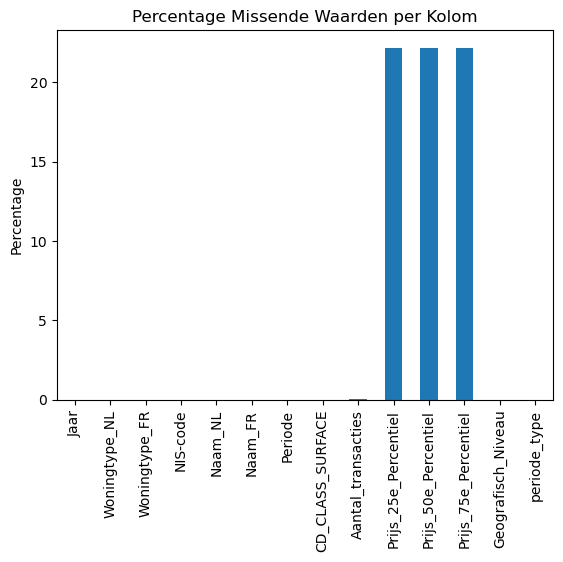

In [21]:
result_mechelen = inspect_df(df_mechelen)
visual_missing_percentage(result_mechelen)

In [22]:
print(result_mechelen["missing_values"])

Jaar                      0
Woningtype_NL             0
Woningtype_FR             0
NIS-code                  0
Naam_NL                   0
Naam_FR                   0
Periode                   0
CD_CLASS_SURFACE          0
Aantal_transacties        1
Prijs_25e_Percentiel    450
Prijs_50e_Percentiel    450
Prijs_75e_Percentiel    450
Geografisch_Niveau        0
periode_type              0
dtype: int64


**Heatmap aantal  missende mediaanprijzen per periode en jaar**

Het percentage missing values ligt nu onder de 40%.

Ik ga nakijken in welke periodes en welke jaren de missing values liggen.

Ik roep dezelfde heatmap op via de functie.

Ik roep het aantal missing values per periode type op via de functie.

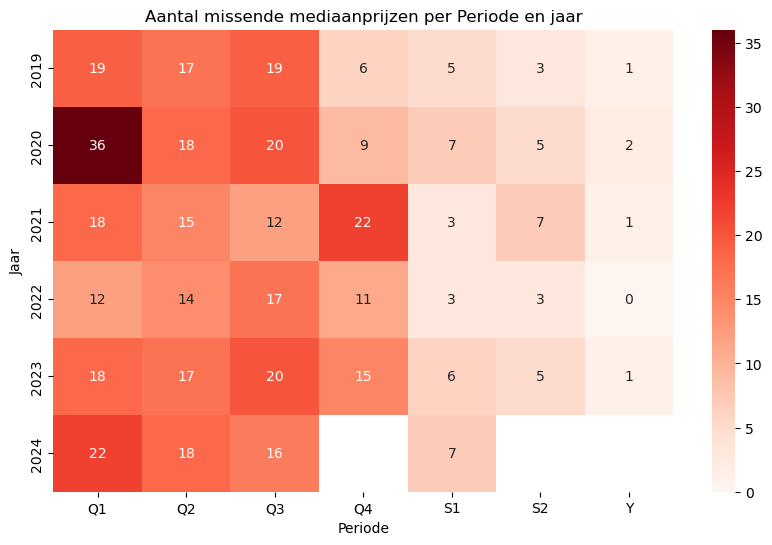

In [23]:
heatmap_missing_values_period_year(df_mechelen)

In [24]:
missing_per_periode_type_mechelen = missing_per_periode_type(df_mechelen)   
print(missing_per_periode_type_mechelen)

              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                             5                     5                     5
Kwartaal                       391                   391                   391
Semester                        54                    54                    54


**Extra check**

Ik bekijk nog twee groeperingen of na te gaan of er geen andere duidelijke patronen zijn.

In [25]:
missing_per_group = df_mechelen.groupby(['Periode', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].apply(lambda x: x.isnull().sum())
#Aantal missende waarden per gemeente
missing_per_gemeente = df_mechelen.groupby('Naam_NL')[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].apply(lambda x: x.isnull().sum())

display(missing_per_gemeente)
display(missing_per_group)

,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel
Naam_NL,,,
BERLAAR,72,72,72
BONHEIDEN,56,56,56
BORNEM,37,37,37
DUFFEL,46,46,46
HEIST-OP-DEN-BERG,7,7,7
LIER,20,20,20
MECHELEN,10,10,10
NIJLEN,24,24,24
PUTTE,32,32,32


Prijs_25e_Percentiel  \
Periode Woningtype_NL                                                              
Q1      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     5   
        Appartementen                                                         54   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                    19   
        Huizen met 4 of meer gevels (open bebouwing)                          47   
Q2      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         47   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     7   
        Huizen met 4 of meer gevels (open bebouwing)                          45   
Q3      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         50   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     9   
        Huizen met 4 of meer gevels (open bebouwing)                          45   
Q4      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         33   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     4   
        Huizen met 4 of meer gevels (open bebouwing)                          26   
S1      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         22   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     0   
        Huizen met 4 of meer gevels (open bebouwing)                           9   
S2      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         18   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     0   
        Huizen met 4 of meer gevels (open bebouwing)                           5   
Y       Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                          4   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     0   
        Huizen met 4 of meer gevels (open bebouwing)                           1   

                                                            Prijs_50e_Percentiel  \
Periode Woningtype_NL                                                              
Q1      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     5   
        Appartementen                                                         54   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                    19   
        Huizen met 4 of meer gevels (open bebouwing)                          47   
Q2      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         47   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     7   
        Huizen met 4 of meer gevels (open bebouwing)                          45   
Q3      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         50   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     9   
        Huizen met 4 of meer gevels (open bebouwing)                          45   
Q4      Alle huizen met 2, 3, 4 of meer gevels (excl. a...                     0   
        Appartementen                                                         33   
        Huizen met 2 of 3 gevels (gesloten + halfopen b...                     4   
        Huizen met 4 of meer gevels (open bebouwing)                          26   
S1      Alle huizen met 2, 

**Eerste toepassing van forward_fill en backward_fill**

Ik pas de methode eerst toe op de kwartalen omdat de meeste missende waardes zich in de kwartalen bevinden

Ik werk binnen kwartalen van hetzelfde jaar

Periodes zoals semester en jaar worden niet aangepast

Ik vul de data per gemeente, jaar en woningtype

Hierna bekijk ik hoeveel missende waardes er nog over zijn --> 262


In [26]:
#Kwartalen uitfilteren
df_mechelen_kwartaal = df_mechelen[df_mechelen["periode_type"] == "Kwartaal"].copy()
#Kwartalen opvullen
df_mechelen_kwartaal.loc[:,['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']] = (
    df_mechelen_kwartaal.groupby(['Naam_NL', 'Jaar', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].transform(lambda group: group.ffill().bfill()))
#Dataframe updaten met nieuwe waardes
df_mechelen.update(df_mechelen_kwartaal)
#Nagaan hoeveel missende waardes er nog over zijn na de aanpassing
print(df_mechelen.isnull().sum())



Jaar                      0
Woningtype_NL             0
Woningtype_FR             0
NIS-code                  0
Naam_NL                   0
Naam_FR                   0
Periode                   0
CD_CLASS_SURFACE          0
Aantal_transacties        1
Prijs_25e_Percentiel    262
Prijs_50e_Percentiel    262
Prijs_75e_Percentiel    262
Geografisch_Niveau        0
periode_type              0
dtype: int64


**Opnieuw missing per periode type bekijen**

Nog niet alle kwartalen zijn gevuld. Dit komt omdat er voor sommige kwartalen geen waardes zijn om mee te vullen.




In [27]:
missing_per_periode_type_mechelen_na_kwartalen1 = missing_per_periode_type(df_mechelen)
print(missing_per_periode_type_mechelen_na_kwartalen1)


              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                             5                     5                     5
Kwartaal                       203                   203                   203
Semester                        54                    54                    54


**Nagaan of er bepaalde woningtypes zijn waarvoor er geen kwartaal is doorgegeven**

Sommige gemeentes hebben voor geen enkel kwartaal data geregistreerd bij bepaalde woningtypes.
Ik indentificeer welke gemeente, woningtype en jaar géén enkel kwartaal bevatten.

In [28]:
# Groepeer per gemeente, woningtype en jaar en tel de missende kwartalen
missing_per_groep = df_mechelen_kwartaal.groupby(["Naam_NL", "Jaar", "Woningtype_NL"])[["Prijs_25e_Percentiel", "Prijs_50e_Percentiel", "Prijs_75e_Percentiel"]].apply(lambda x: x.isnull().sum())
missing_per_groep.head()
# Toon alleen de groepen waar alle waarden ontbreken
totaal_missing = missing_per_groep[(missing_per_groep == 4).all(axis=1)]
totaal_missing.head()

# Bekijk de eerste resultaten
totaal_missing.index.unique()
# df_mechelen.to_excel("df_mechelen.xlsx", index=False)


MultiIndex([(             'BERLAAR', 2019, ...),
            (             'BERLAAR', 2019, ...),
            (             'BERLAAR', 2020, ...),
            (             'BERLAAR', 2020, ...),
            (             'BERLAAR', 2021, ...),
            (             'BERLAAR', 2021, ...),
            (             'BERLAAR', 2022, ...),
            (             'BERLAAR', 2022, ...),
            (             'BERLAAR', 2023, ...),
            (             'BERLAAR', 2023, ...),
            (           'BONHEIDEN', 2019, ...),
            (           'BONHEIDEN', 2020, ...),
            (           'BONHEIDEN', 2021, ...),
            (           'BONHEIDEN', 2022, ...),
            (           'BONHEIDEN', 2023, ...),
            (           'BONHEIDEN', 2023, ...),
            (              'BORNEM', 2022, ...),
            (              'BORNEM', 2023, ...),
            (              'BORNEM', 2023, ...),
            (              'DUFFEL', 2020, ...),
            (       

**Extra check**

We zien dat bv voor duffel effectief voor appartementen voor bepaalde jaren de 4 kwartalen niet zijn ingevuld.

In [29]:
df_mechelen[(df_mechelen['Naam_NL'] == "DUFFEL") & (df["Woningtype_NL"] == "Appartementen")]


C:\Users\kathl\AppData\Local\Temp\ipykernel_10808\2636834533.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mechelen[(df_mechelen['Naam_NL'] == "DUFFEL") & (df["Woningtype_NL"] == "Appartementen")]


,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
13678,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q1,totaal / total,7.0,175000.0,206500.0,252000.0,5,Kwartaal
13679,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q2,totaal / total,18.0,175000.0,206500.0,252000.0,5,Kwartaal
13680,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q3,totaal / total,9.0,175000.0,206500.0,252000.0,5,Kwartaal
13681,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q4,totaal / total,17.0,195000.0,226000.0,252000.0,5,Kwartaal
13682,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,S1,totaal / total,25.0,175000.0,220000.0,252000.0,5,Semester
13683,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,S2,totaal / total,26.0,190000.0,220500.0,245500.0,5,Semester
13684,2019,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Y,totaal / total,51.0,181500.0,220000.0,252000.0,5,Jaar
31542,2020,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q1,totaal / total,7.0,NaN,NaN,NaN,5,Kwartaal
31543,2020,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q2,totaal / total,6.0,NaN,NaN,NaN,5,Kwartaal
31544,2020,Appartementen,Appartements,12009,DUFFEL,DUFFEL,Q3,totaal / total,7.0,NaN,NaN,NaN,5,Kwartaal


**Analyse van ontbrekende waarden per gemeente en woningtype**

Ik onderzoek het percentage ontbrekende waarden per combinatie van gemeente en woningtype.

Omdat ik werk met drie prijspercentielen (25e, 50e en 75e), bereken ik het gemiddelde missingspercentage om een algemeen beeld te krijgen van de datavolledigheid.

Ik focus op combinaties waarbij meer dan 50% van de waarden ontbreekt, omdat deze onvoldoende betrouwbaar zijn voor verdere analyse.

In totaal vond ik 5 van zulke combinaties, waarvan de meeste betrekking hebben op appartementen in 5 verschillende gemeenten.

Deze rijen nam ik niet meer mee in verdere analyse

In [30]:
# Bereken het percentage missende waarden per gemeente en woningtype
missing_percentages = df_mechelen.groupby(['Naam_NL', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].apply(lambda x: x.isnull().mean() * 100)
#print(missing_percentages)
# Neem het gemiddelde missende percentage over de drie prijspercentielen om een samenvattende score per combo van gemeente en woningtype.
missing_percentages['Gemiddeld_Missing_%'] = missing_percentages.mean(axis=1)
#print(missing_percentages)
# Filter alleen de combinaties waar meer dan 50% van de waarden ontbreekt
gemeenten_met_veel_missende_data = missing_percentages[missing_percentages['Gemiddeld_Missing_%'] > 50].reset_index()

# Toon alleen de relevante kolommen
gemeenten_met_veel_missende_data = gemeenten_met_veel_missende_data[['Naam_NL', 'Woningtype_NL', 'Gemiddeld_Missing_%']]
# Sorteer op grootste percentage eerst
gemeenten_met_veel_missende_data = gemeenten_met_veel_missende_data.sort_values(by='Gemiddeld_Missing_%', ascending=False)

print(gemeenten_met_veel_missende_data)




                Naam_NL                                 Woningtype_NL  \
4                 ZEMST                                 Appartementen   
2             BONHEIDEN                                 Appartementen   
0               BERLAAR                                 Appartementen   
3  SINT-KATELIJNE-WAVER                                 Appartementen   
1               BERLAAR  Huizen met 4 of meer gevels (open bebouwing)   

   Gemiddeld_Missing_%  
4            94.871795  
2            89.743590  
0            82.051282  
3            79.487179  
1            74.358974  


**Verwijderen van deze combinaties van gemeente en woningtype met meer dan 50% missing values**

Ik haal de combinaties van gemeente en woningtype op met meer dan 50% ontbrekende prijswaarden.

Daarna doe ik een left merge op df_mechelen om deze combinaties te markeren via de _merge-kolom.

Ik filter enkel de rijen met "left_only" om de ongewenste combinaties uit de dataset te verwijderen.

De _merge-kolom verwijder ik opnieuw.

Tot slot bereken ik hoeveel rijen verwijderd zijn en controleer ik hoeveel ontbrekende waarden er nog overblijven per periode.



In [31]:
#de gemeenten met te veel missende data verwijderen.

#Haal de gemeenten en woningtypes op die ik wil verwijderen
gemeenten_woningtypes_te_verwijderen= gemeenten_met_veel_missende_data[['Naam_NL', "Woningtype_NL"]]

#Verwijder de '_merge' kolom als die al bestaat
if '_merge' in df_mechelen.columns:
    df_mechelen = df_mechelen.drop(columns=['_merge'])

# Merge de dataset om te zien welke rijen in de verwijderlijst zitten.
# Door indicator=True toe te voegen, ontstaat er een nieuwe kolom _merge, waarmee ik kan aanduiden welke rijen enkel in de oorspronkelijke dataset voorkomen.
df_mechelen = df_mechelen.merge(
    gemeenten_woningtypes_te_verwijderen, 
    on=['Naam_NL', 'Woningtype_NL'], 
    how='left', 
    indicator=True
)

#filteren op 'left_only' om de ongewenste combinaties te verwijderen + kopie nemen
df_mechelen_filterd = df_mechelen[df_mechelen["_merge"]== "left_only"].copy()

#ik verwijder de merge kolom want die is niet meer nodig
df_mechelen_filterd.drop(columns = ["_merge"], inplace = True)

#Berekenen van aantal verwijderde rijen
aantal_verwijderde_rijen = len(df_mechelen)- len(df_mechelen_filterd)
print(f"aantal verwijderde rijen = {aantal_verwijderde_rijen}")

#opnieuw missig values bekijken
missing_per_period_type = missing_per_periode_type(df_mechelen_filterd)
print(missing_per_period_type)

#df_mechelen_filterd.to_excel("df_mechelen_filterd.xlsx", index=False)

#opgeschoonde versie maken van df_mechelen
df_mechelen = df_mechelen_filterd

aantal verwijderde rijen = 195
              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                             0                     0                     0
Kwartaal                        88                    88                    88
Semester                        10                    10                    10


**Ontbrekede semesterwaarden opvullen**

Er zijn 10 ontbrekende semesterwaarden per prijspercentiel.

Eerst vullen we deze op met forward fill en backward fill.
    
Vervolgens zijn er nog 3 ontbrekende waarden over.
    
Deze verwijderen we.

In [32]:
#Vervolgens de missende waarden in de semester periode aanpakken.
#filter enkel de rijen met 'Semester' als periode_type en maak een kopie
df_mechelen_semester = df_mechelen[df_mechelen["periode_type"] == "Semester"].copy()

#Vul de missende waarden op in de percentielkolommen per combinatie van gemeente, jaar en woningtype met ffill en bfill
df_mechelen_semester.loc[:,['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']] = (
    df_mechelen_semester.groupby(['Naam_NL', 'Jaar', 'Woningtype_NL'])[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].transform(lambda group: group.ffill().bfill()))

#Werk de originele dataframe bij met de aangepaste semesterdata
df_mechelen.update(df_mechelen_semester)

#Bereken het aantal missende waarden per periode_type na de opvulling
missing_per_period_type = missing_per_periode_type(df_mechelen)
print(missing_per_period_type)

#Filter de overgebleven semester-rijen waarin nog steeds minstens één NaN staat
df_mechelen_semester_missing = df_mechelen[
    (df_mechelen["periode_type"] == "Semester") & 
    (df_mechelen[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].isnull().any(axis=1))
]

#Verwijder deze resterende onvolledige semester-rijen uit de dataset
df_mechelen= df_mechelen.drop(df_mechelen_semester_missing.index)

#opnieuw controle op de missing values
missing_values_after = missing_per_periode_type(df_mechelen)
print("Aantal overgebleven missende waarden per periode type na verwijderen:")
print(missing_values_after)













              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                             0                     0                     0
Kwartaal                        88                    88                    88
Semester                         3                     3                     3
Aantal overgebleven missende waarden per periode type na verwijderen:
              Prijs_25e_Percentiel  Prijs_50e_Percentiel  Prijs_75e_Percentiel
periode_type                                                                  
Jaar                             0                     0                     0
Kwartaal                        88                    88                    88
Semester                         0                     0                     0


**Invullen van ontbrekende kwartaalwaarden**

De ontbrekende kwartaalwaarden (Q1, Q2, Q3 en Q4) werden aangevuld op basis van de bijhorende semesterwaarden (S1 en S2).

Aangezien het gaat om mediaanprijzen per periode, heb ik ervoor gekozen om de waarde van het semester rechtstreeks toe te wijzen aan de bijhorende kwartalen.

De mediaanprijs van een semester is de prijs die in het midden ligt van alle verkopen in die 6 maanden.

We weten niet wat de exacte mediaanprijs was in elk kwartaal apart (Q1 en Q2), dus gebruiken we de mediaan van het volledige semester als een schatting.


In [33]:
#Kolommen die we willen invullen
kolommen = ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']

#Vul Q1 en Q2 in met S1 (als die bestaat)
for col in kolommen:
    df_mechelen.loc[df_mechelen['Periode'].isin(['Q1', 'Q2']), col] = df_mechelen.groupby(['Naam_NL', 'Jaar', 'Woningtype_NL'])[col].transform(
        lambda x: x.fillna(x[df_mechelen['Periode'] == 'S1'].values[0]) if len(x[df_mechelen['Periode'] == 'S1'].values) > 0 else x
    )

#Vul Q3 en Q4 in met S2 (als die bestaat)
for col in kolommen:
    df_mechelen.loc[df_mechelen['Periode'].isin(['Q3', 'Q4']), col] = df_mechelen.groupby(['Naam_NL', 'Jaar', 'Woningtype_NL'])[col].transform(
        lambda x: x.fillna(x[df_mechelen['Periode'] == 'S2'].values[0]) if len(x[df_mechelen['Periode'] == 'S2'].values) > 0 else x
    )

#Controleer of er nog missende waarden overblijven
missing_values_after = df_mechelen[kolommen].isnull().sum()
print("Aantal overgebleven missende waarden per kolom na invullen:")
print(missing_values_after)




Aantal overgebleven missende waarden per kolom na invullen:
Prijs_25e_Percentiel    14
Prijs_50e_Percentiel    14
Prijs_75e_Percentiel    14
dtype: int64


**De 14 rijen met missende waardes verwijderen**

Ik verwijder eerst alle rijen met jaar 2024 en periode Q4 want we zagen eerder dat die volledig nul was.

vervolgens controleer ik weer de rijen met missende waardes. Dit zijn er nog steeds 14.

Ik verwijder deze volledig uit de dataframe.

In [34]:
#Verwijder alleen de rijen waar 'Jaar' 2024 is en 'Periode' Q4
df_mechelen = df_mechelen[~((df_mechelen['Jaar'] == 2024) & (df_mechelen['Periode'] == 'Q4'))]

#Controleer hoeveel rijen er nog steeds missende waarden hebben
df_missing = df_mechelen[df_mechelen[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].isnull().any(axis=1)]

display(df_missing)

,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
1880,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12007,BORNEM,BORNEM,Q1,totaal / total,9.0,NaN,NaN,NaN,5,Kwartaal
1881,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12007,BORNEM,BORNEM,Q2,totaal / total,8.0,NaN,NaN,NaN,5,Kwartaal
1882,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12007,BORNEM,BORNEM,Q3,totaal / total,12.0,NaN,NaN,NaN,5,Kwartaal
1884,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12009,DUFFEL,DUFFEL,Q1,totaal / total,7.0,NaN,NaN,NaN,5,Kwartaal
1885,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12009,DUFFEL,DUFFEL,Q2,totaal / total,1.0,NaN,NaN,NaN,5,Kwartaal
1886,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12009,DUFFEL,DUFFEL,Q3,totaal / total,5.0,NaN,NaN,NaN,5,Kwartaal
1892,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12021,LIER,LIERRE,Q1,totaal / total,6.0,NaN,NaN,NaN,5,Kwartaal
1893,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12021,LIER,LIERRE,Q2,totaal / total,5.0,NaN,NaN,NaN,5,Kwartaal
1894,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12021,LIER,LIERRE,Q3,totaal / total,12.0,NaN,NaN,NaN,5,Kwartaal
1914,2024,Huizen met 4 of meer gevels (open bebouwing),Maisons avec 4 ou plus de façades (type ouvert),12040,WILLEBROEK,WILLEBROEK,Q3,totaal / total,6.0,NaN,NaN,NaN,5,Kwartaal


**Verwijder rijen uit 2024 die nog missende waardes bevatten (14)**

In [35]:
#Verwijder rijen uit 2024 die nog missende waarden bevatten
df_mechelen = df_mechelen.dropna(subset=['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel'])

#Controleer of er nog missende waarden overblijven
missing_values_after = df_mechelen[['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']].isnull().sum()
print("Aantal overgebleven missende waarden per kolom na verwijderen probleemrijen:")
print(missing_values_after)


Aantal overgebleven missende waarden per kolom na verwijderen probleemrijen:
Prijs_25e_Percentiel    0
Prijs_50e_Percentiel    0
Prijs_75e_Percentiel    0
dtype: int64


**Controle na het verwijderen**

In [36]:
#Tel het aantal missende waarden per kolom in de volledige dataset
missing_values_final = df_mechelen.isnull().sum()

#Filter alleen de kolommen waar nog missende waarden zijn
missing_values_final = missing_values_final[missing_values_final > 0]

#Resultaat weergeven
if missing_values_final.empty:
    print("Er zijn geen missende waarden meer in de dataset!")
else:
    print("Er zijn nog steeds missende waarden in de volgende kolommen:")
    print(missing_values_final)

Er zijn geen missende waarden meer in de dataset!


**Ik filter de dataset op de 3 woningtypes die van belang zijn voor analyse**

In [37]:
df_mechelen_clean = df_mechelen[df_mechelen['Woningtype_NL'] != 'Alle huizen met 2, 3, 4 of meer gevels (excl. appartementen)']


**Eerste algemeen plot om +- na te gaan dat de data goed is opgeschoond**

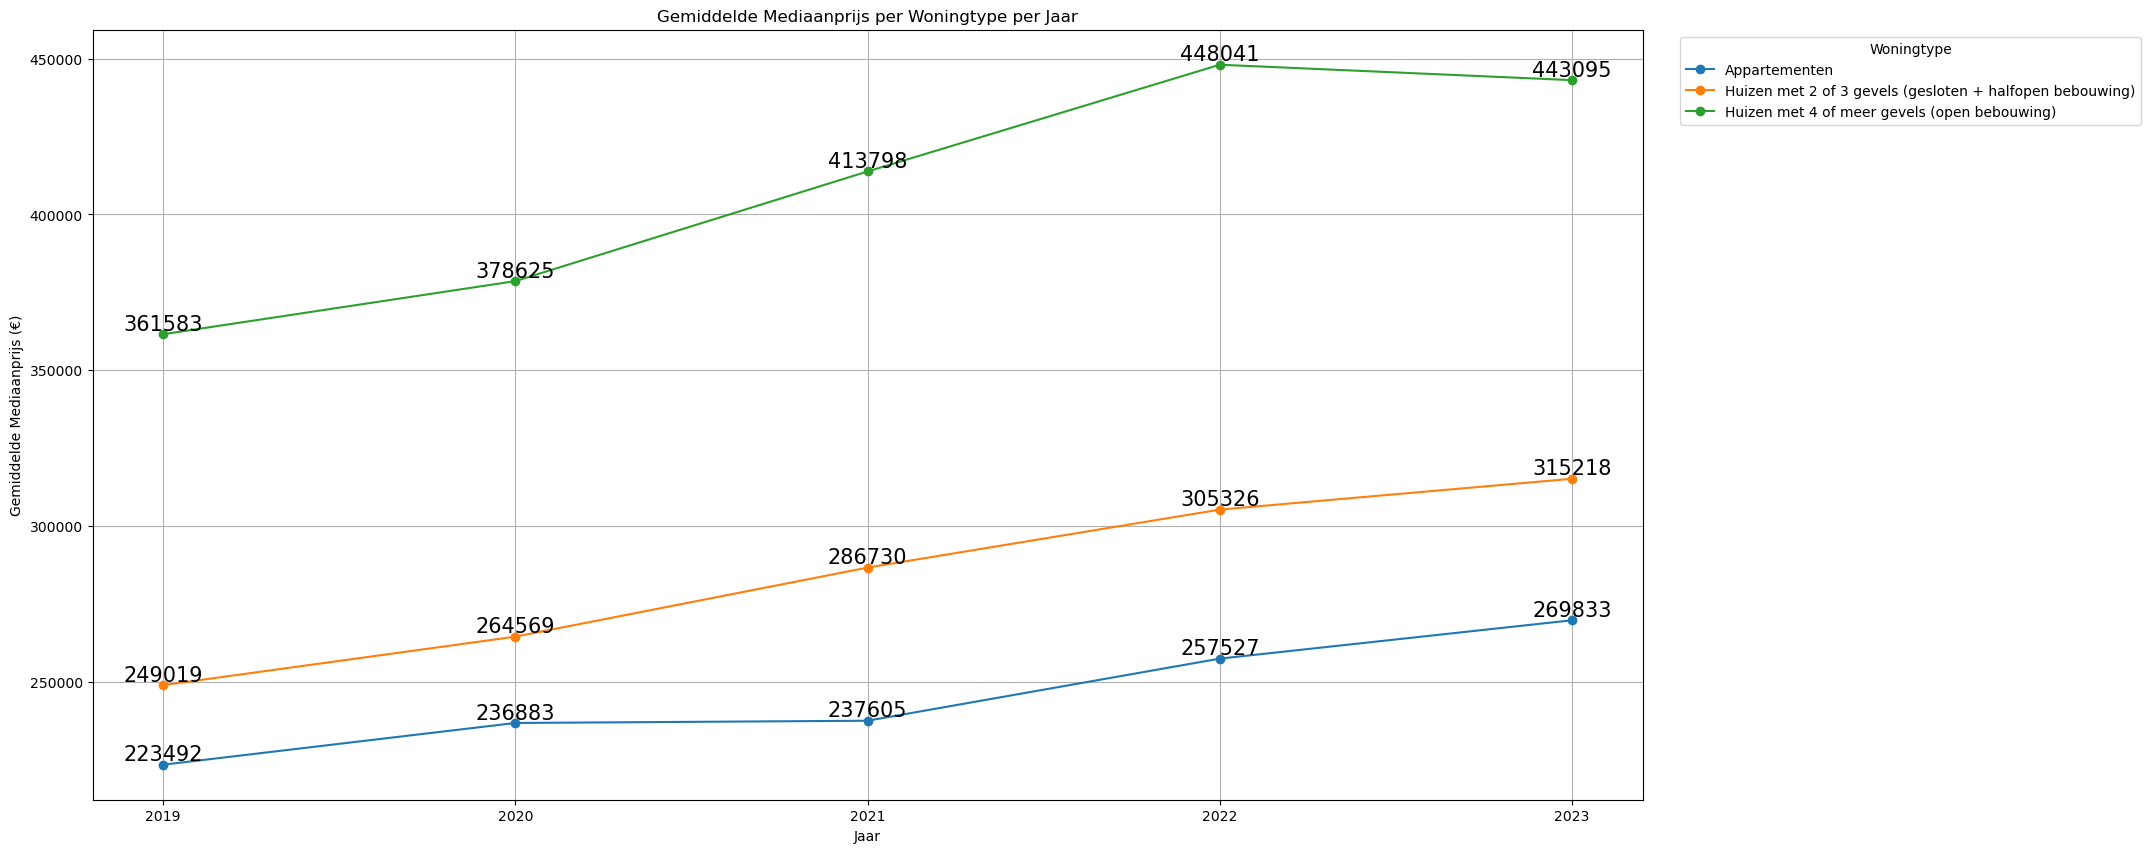

In [38]:
#Groepeer de dataset per jaar en woningtype, neem het gemiddelde van de mediaanprijzen
df_mechelen_jaar = df_mechelen_clean[df_mechelen_clean['periode_type'] == 'Jaar']
df_plot = df_mechelen_jaar.groupby(['Jaar', 'Woningtype_NL'])['Prijs_50e_Percentiel'].mean().reset_index()

#Maak een figuur
fig, ax = plt.subplots(figsize=(20, 10))

#Lijnplot voor elk woningtype
for woningtype in df_plot['Woningtype_NL'].unique():
    subset = df_plot[df_plot['Woningtype_NL'] == woningtype]
    ax.plot(subset['Jaar'], subset['Prijs_50e_Percentiel'], marker='o', linestyle='-', label=woningtype)
    
    #Voeg labels toe boven elke marker
    for x, y in zip(subset['Jaar'], subset['Prijs_50e_Percentiel']):
        ax.text(x, y, f"{int(y)}", ha='center', va='bottom', fontsize=15, color='black')


ax.set_xlabel("Jaar")
ax.set_ylabel("Gemiddelde Mediaanprijs (€)")
ax.set_title("Gemiddelde Mediaanprijs per Woningtype per Jaar")
ax.set_xticks(sorted(df_plot['Jaar'].unique()))  #Enkel hele jaartallen
ax.grid(True)
ax.legend(title="Woningtype", loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig('plots/lijnplot Gemiddelde Mediaanprijs per Woningtype per Jaar', dpi=300, bbox_inches='tight')
plt.show()



**Controle op outliers na opschoning**

Na de opschoning van de dataset via forward en backward fill binnen combinatie van jaar, woningtype en gemeente, controleer ik opnieuw de outliers.

ik bekijk de shape van de outliers via de functie check_outliers, om te bepalen hoeveel rijen nog als uitschieter worden beschouwd.

Na de opschoning bleven er nog slechts 2 rijen over die als outlier werden gedetecteerd op de kolom Prijs_50e_Percentiel.

De conclusie is dat de resterende outliers realistisch en representatief zijn voor uitzonderlijke maar legitieme woningprijzen (bv. luxewoningen, grote panden, nieuwbouw). Daarom heb ik deze behouden in de dataset.

Onderstaande boxplots tonen ter vergelijking de verdeling van Prijs_50e_Percentiel voor en na opschoning, wat duidelijk het effect van de datacleaning illustreert.



In [39]:
print(check_outliers(df_mechelen_clean, 'Prijs_25e_Percentiel').shape)
print(check_outliers(df_mechelen_clean, 'Prijs_50e_Percentiel').shape)
print(check_outliers(df_mechelen_clean, 'Prijs_75e_Percentiel').shape)



(5, 14)
(2, 14)
(20, 14)


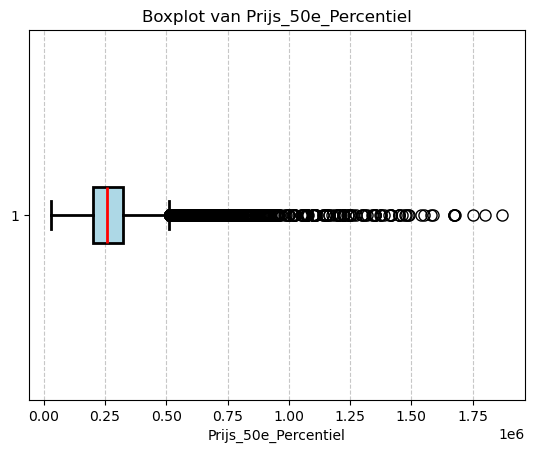

In [40]:
create_boxplot(df,'Prijs_50e_Percentiel')

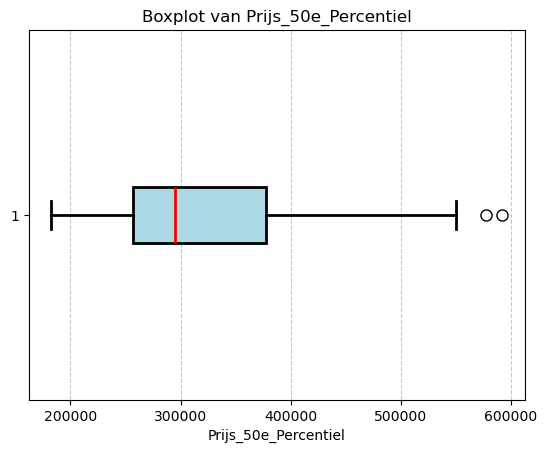

In [41]:
create_boxplot(df_mechelen_clean,'Prijs_50e_Percentiel')

**Plot om de evolutie van de gemiddelde mediaanprijzen (Prijs_50e_Percentiel) per woningtype over de jaren te visualiseren.**

Ik heb reeds een dataframe df_plot, waarin reeds per jaar en per woningtype het gemiddelde van de kolom Prijs_50e_Percentiel is berekend.

Sorteren van df_plot op Woningtype_NL en Jaar

Ik voeg een nieuwe kolom YOY toe met de procentuele evolutie per woningtype, berekend op het gemiddelde van de Prijs_50e_Percentiel

Deze YOY-berekening toont hoe sterk de gemiddelde mediaanprijzen per woningtype zijn gestegen of gedaald ten opzichte van het voorgaande jaar.


In [42]:
df_sorted_per_woningtype_jaar = df_plot.sort_values(['Woningtype_NL', 'Jaar']).reset_index(drop = True)
df_sorted_per_woningtype_jaar['YOY'] = (df_sorted_per_woningtype_jaar.groupby('Woningtype_NL')['Prijs_50e_Percentiel'].pct_change()*100).round(2)
df_sorted_per_woningtype_jaar['YOY_verschil'] = df_sorted_per_woningtype_jaar.groupby('Woningtype_NL')['YOY'].diff().round(2)
df_sorted_per_woningtype_jaar

,Jaar,Woningtype_NL,Prijs_50e_Percentiel,YOY,YOY_verschil
0,2019,Appartementen,223492.777778,NaN,NaN
1,2020,Appartementen,236883.333333,5.99,NaN
2,2021,Appartementen,237605.555556,0.30,-5.69
3,2022,Appartementen,257527.777778,8.38,8.08
4,2023,Appartementen,269833.333333,4.78,-3.60
5,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,249019.230769,NaN,NaN
6,2020,Huizen met 2 of 3 gevels (gesloten + halfopen ...,264569.230769,6.24,NaN
7,2021,Huizen met 2 of 3 gevels (gesloten + halfopen ...,286730.769231,8.38,2.14
8,2022,Huizen met 2 of 3 gevels (gesloten + halfopen ...,305326.923077,6.49,-1.89
9,2023,Huizen met 2 of 3 gevels (gesloten + halfopen ...,315218.230769,3.24,-3.25


**Plot Hoe snel stijgt of daalt de gemiddelde mediaanprijs van elk woningtype per jaar?**

Hoeveel % stijgt of daalt de gemiddelde Prijs_50e_Percentiel per woningtype t.o.v. het vorige jaar?

Appartementen tonen een sterk wisselend verloop:
een forse daling in 2021, herstel in 2022, en opnieuw daling in 2023.

Huizen met 2 of 3 gevels zijn het meest stabiel:
geen extreme uitschieters, enkel kleine fluctuaties.

Huizen met 4 of meer gevels (open bebouwing) kenden eerst een stijging, maar sinds 2022 twee jaar op rij daling, met in 2023 een daling van 9,38%.





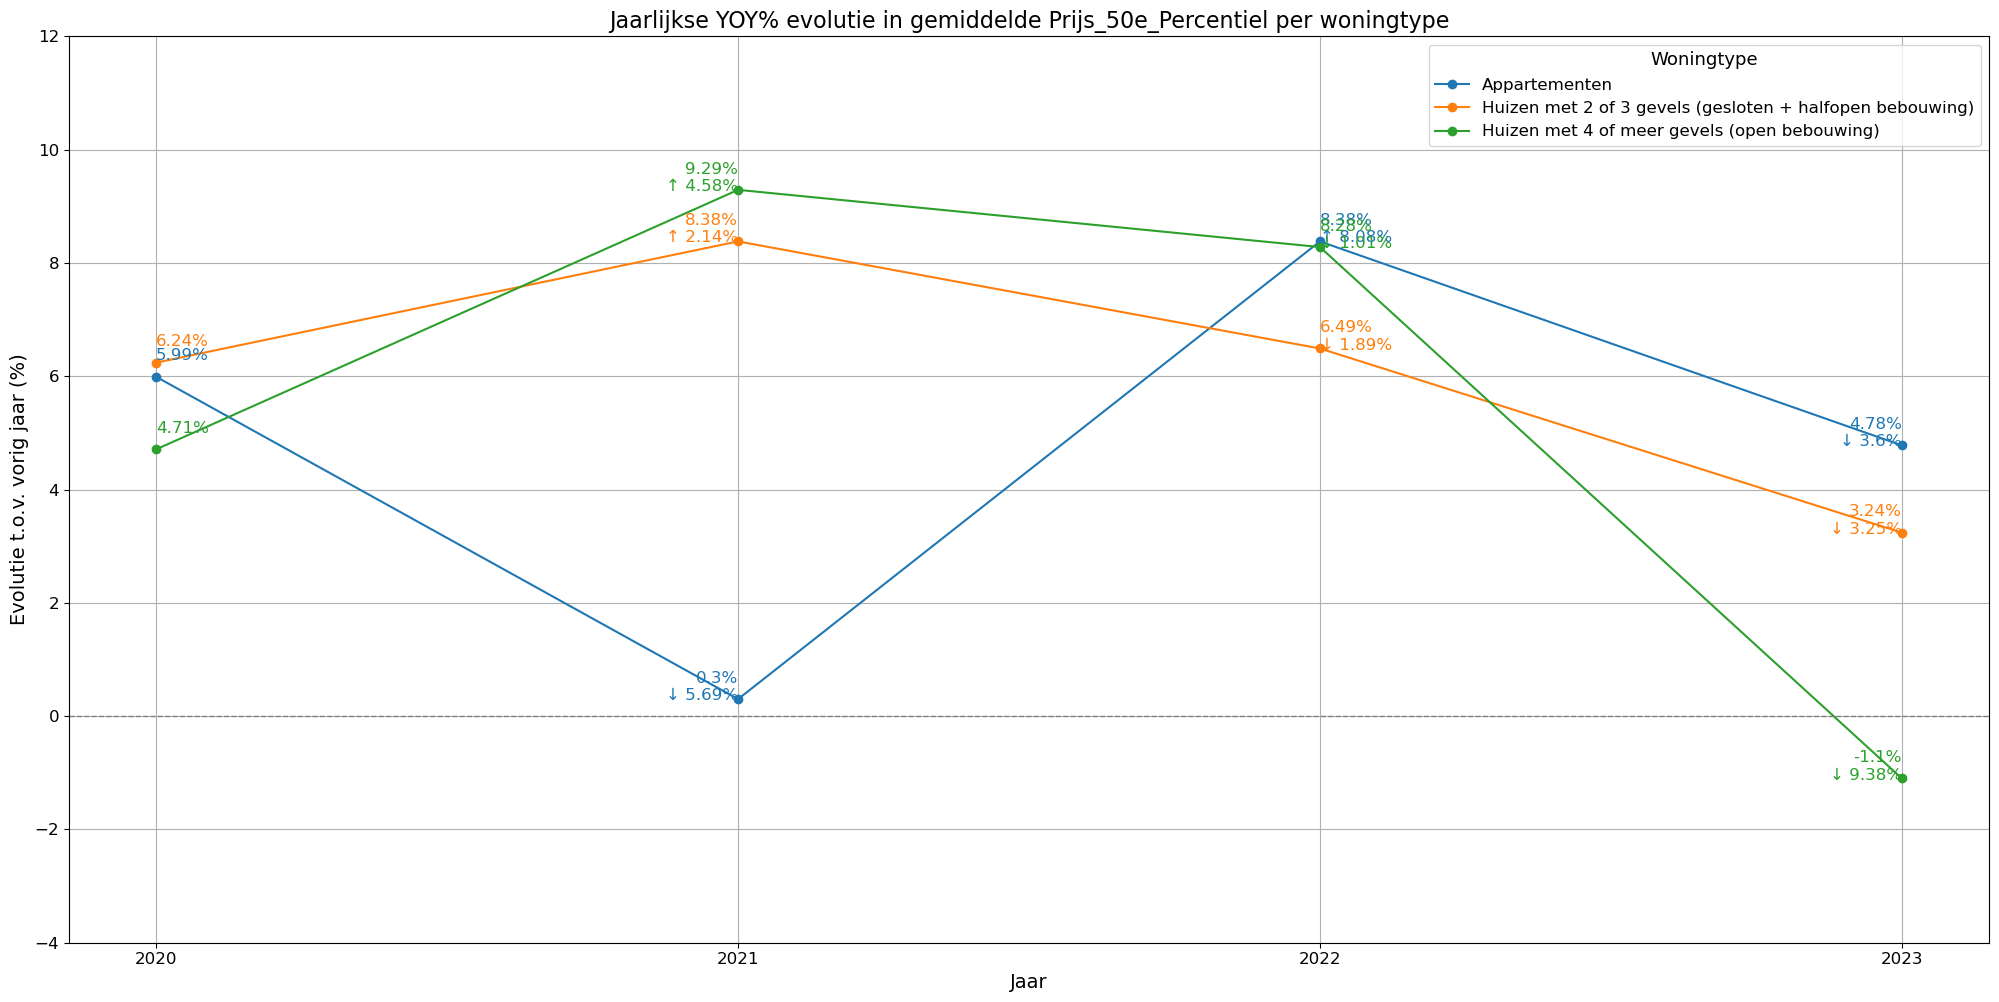

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

kleuren = {}
#Voor elke woningtype + groep van jaren
for woningtype, groep in df_sorted_per_woningtype_jaar.groupby('Woningtype_NL'):
    #verwijder de nan_waarden want voor 2019 zijn er geen waardes YOY
    groep = groep.dropna(subset=['YOY'])
    #Plot een lijn voor dit woningtype en bewaar het lijnobject om de kleur later te kunnen gebruiken (unpacking door gebruik van ,)
    lijn, = ax.plot(groep['Jaar'], groep['YOY'], marker='o', label=woningtype)
    #haal de kleur op per lijn om later te gebruiken
    kleur = lijn.get_color()
    kleuren[woningtype] = kleur
    
    #voor elke index en rij in groep (df met alle jaren voor een woningtype)
    #itterrows gaat door elke rij in de df en geeft een tuple terug van index en de rij zelf als een series opbject
    for i, row in groep.iterrows():
        #maak een label met yoy%
        label = f"{row['YOY']}%"
        #haal het verschil tov PY op
        yoy_verschil = row['YOY_verschil']
        #als yoy_verschil niet nul is positief symbool als yoy_verschil positief is, negatief symbool als yoy_verschil negatief is
        if pd.notna(yoy_verschil):
            symbool = '↑' if yoy_verschil > 0 else '↓'
            #Voeg het symbool en de absolute waarde van het verschil toe op een nieuwe regel. het symbool geeft de richting al aan vandaar absolute waarde
            label += f"\n{symbool} {abs(yoy_verschil)}%"
        #Bepaal of de tekst links of rechts uitgelijnd wordt, afhankelijk van even/oneven jaartal
        ha = 'left' if row['Jaar'] % 2 == 0 else 'right'
        #Zet de tekst op de plot, iets boven het punt op de lijn
        ax.text(
            row['Jaar'],
            row['YOY'] + 0.5,
            label,
            fontsize=12,
            color = kleur,
            ha=ha,
            va='top'
        )

        
#teken een nullijn
ax.axhline(0, color='grey', linestyle='--', linewidth=1)

#Titel en as-labels instellen
ax.set_title('Jaarlijkse YOY% evolutie in gemiddelde Prijs_50e_Percentiel per woningtype')
ax.set_xlabel('Jaar')
ax.set_ylabel('Evolutie t.o.v. vorig jaar (%)')

#Bepaal de unieke jaartallen waarvoor er een YOY-waarde bestaat
jaren_met_yoy = df_sorted_per_woningtype_jaar.dropna(subset=['YOY'])['Jaar'].unique()
#Gebruik die waardes als x_ticks
ax.set_xticks(sorted(jaren_met_yoy))

#toon een grid in de figuur
ax.grid(True)
#Maak een legende
ax.legend(title='Woningtype')
#spelen met de y_as voor leesbaarheid
ax.set_ylim(-4, 12)
#layout
plt.tight_layout()
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(title='Woningtype', fontsize=12, title_fontsize=13)
plt.savefig('plots/lijnplot Jaarlijkse YOY evolutie in gemiddelde Prijs_50e_Percentiel per woningtype', dpi=300, bbox_inches='tight')
plt.show()





**YOY-analyse voor meerdere prijspercentielen tegelijk**

Doel: Eenzelfde YOY-plot maken, maar voor de drie prijspercentielen tegelijk (25e, 50e, 75e percentiel).

Eerst een df maken met het gemiddelde per jaar en woningtype voor de drie prijspercentielen.

Daarna bereken ik voor elk van de drie kolommen:

De YOY (Year-over-Year) procentuele verandering per woningtype

Het verschil in YOY ten opzichte van het vorige jaar

**Conclusie**

De jaarlijkse prijsverandering (YOY) laat duidelijke verschillen zien tussen woningtypes en prijscategorieën:

Appartementen (blauw) tonen opvallende prijsschommelingen, vooral in de lagere percentielen (25e & 50e). In deze segmenten zie je sterke opwaartse én neerwaartse bewegingen, wat wijst op een hogere volatiliteit.

Open bebouwing (groen) kende tussen 2020 en 2022 steile prijsstijgingen, maar daalde in 2023 fors in het 25e en 50e percentiel. Ook hier is veel dynamiek zichtbaar, vooral aan de onder- en middenkant van de markt.

Gesloten en halfopen bebouwing (oranje) volgt een gelijkaardig, iets gematigder patroon, maar ook hier is de prijs in 2023 sterk teruggevallen in het 25e percentiel.

Het 75e percentiel toont in alle woningtypes de kleinste prijsschommelingen over de jaren heen. Dit suggereert dat de duurdere segmenten relatief stabieler zijn dan goedkopere woningen.

In [44]:
df_mechelen_mean = df_mechelen_jaar.groupby(['Jaar', 'Woningtype_NL'])[['Prijs_25e_Percentiel','Prijs_50e_Percentiel','Prijs_75e_Percentiel']].mean().reset_index()
df_yoy = df_mechelen_mean.copy()
for kolom in ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']:
    df_yoy[f'YOY_{kolom}'] = df_yoy.groupby('Woningtype_NL')[kolom].pct_change() * 100
    df_yoy[f'YOY_{kolom}'] = df_yoy[f'YOY_{kolom}'].round(2)
    df_yoy[f'YOY_verschil_{kolom}'] = df_yoy.groupby('Woningtype_NL')[f'YOY_{kolom}'].diff().round(2)
df_yoy
    

,Jaar,Woningtype_NL,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,YOY_Prijs_25e_Percentiel,YOY_verschil_Prijs_25e_Percentiel,YOY_Prijs_50e_Percentiel,YOY_verschil_Prijs_50e_Percentiel,YOY_Prijs_75e_Percentiel,YOY_verschil_Prijs_75e_Percentiel
0,2019,Appartementen,180322.444444,223492.777778,262279.111111,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,200634.615385,249019.230769,309503.846154,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Huizen met 4 of meer gevels (open bebouwing),297708.333333,361583.333333,440458.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Appartementen,197333.666667,236883.333333,275633.222222,9.43,NaN,5.99,NaN,5.09,NaN
4,2020,Huizen met 2 of 3 gevels (gesloten + halfopen ...,210961.538462,264569.230769,324230.769231,5.15,NaN,6.24,NaN,4.76,NaN
5,2020,Huizen met 4 of meer gevels (open bebouwing),306750.000000,378625.000000,472250.000000,3.04,NaN,4.71,NaN,7.22,NaN
6,2021,Appartementen,200444.444444,237605.555556,289000.000000,1.58,-7.85,0.30,-5.69,4.85,-0.24
7,2021,Huizen met 2 of 3 gevels (gesloten + halfopen ...,231076.923077,286730.769231,351591.153846,9.54,4.39,8.38,2.14,8.44,3.68
8,2021,Huizen met 4 of meer gevels (open bebouwing),337541.666667,413798.750000,514303.833333,10.04,7.00,9.29,4.58,8.90,1.68
9,2022,Appartementen,216305.555556,257527.777778,307216.666667,7.91,6.33,8.38,8.08,6.30,1.45


**Lijnplot evolutie gemiddelde mediaanprijs per jaar voor de drie prijspercentielen**

Ik maak een functie om het lijnplot met de evolutie over de jaren weer te geven voor de 3 prijspercentielen.

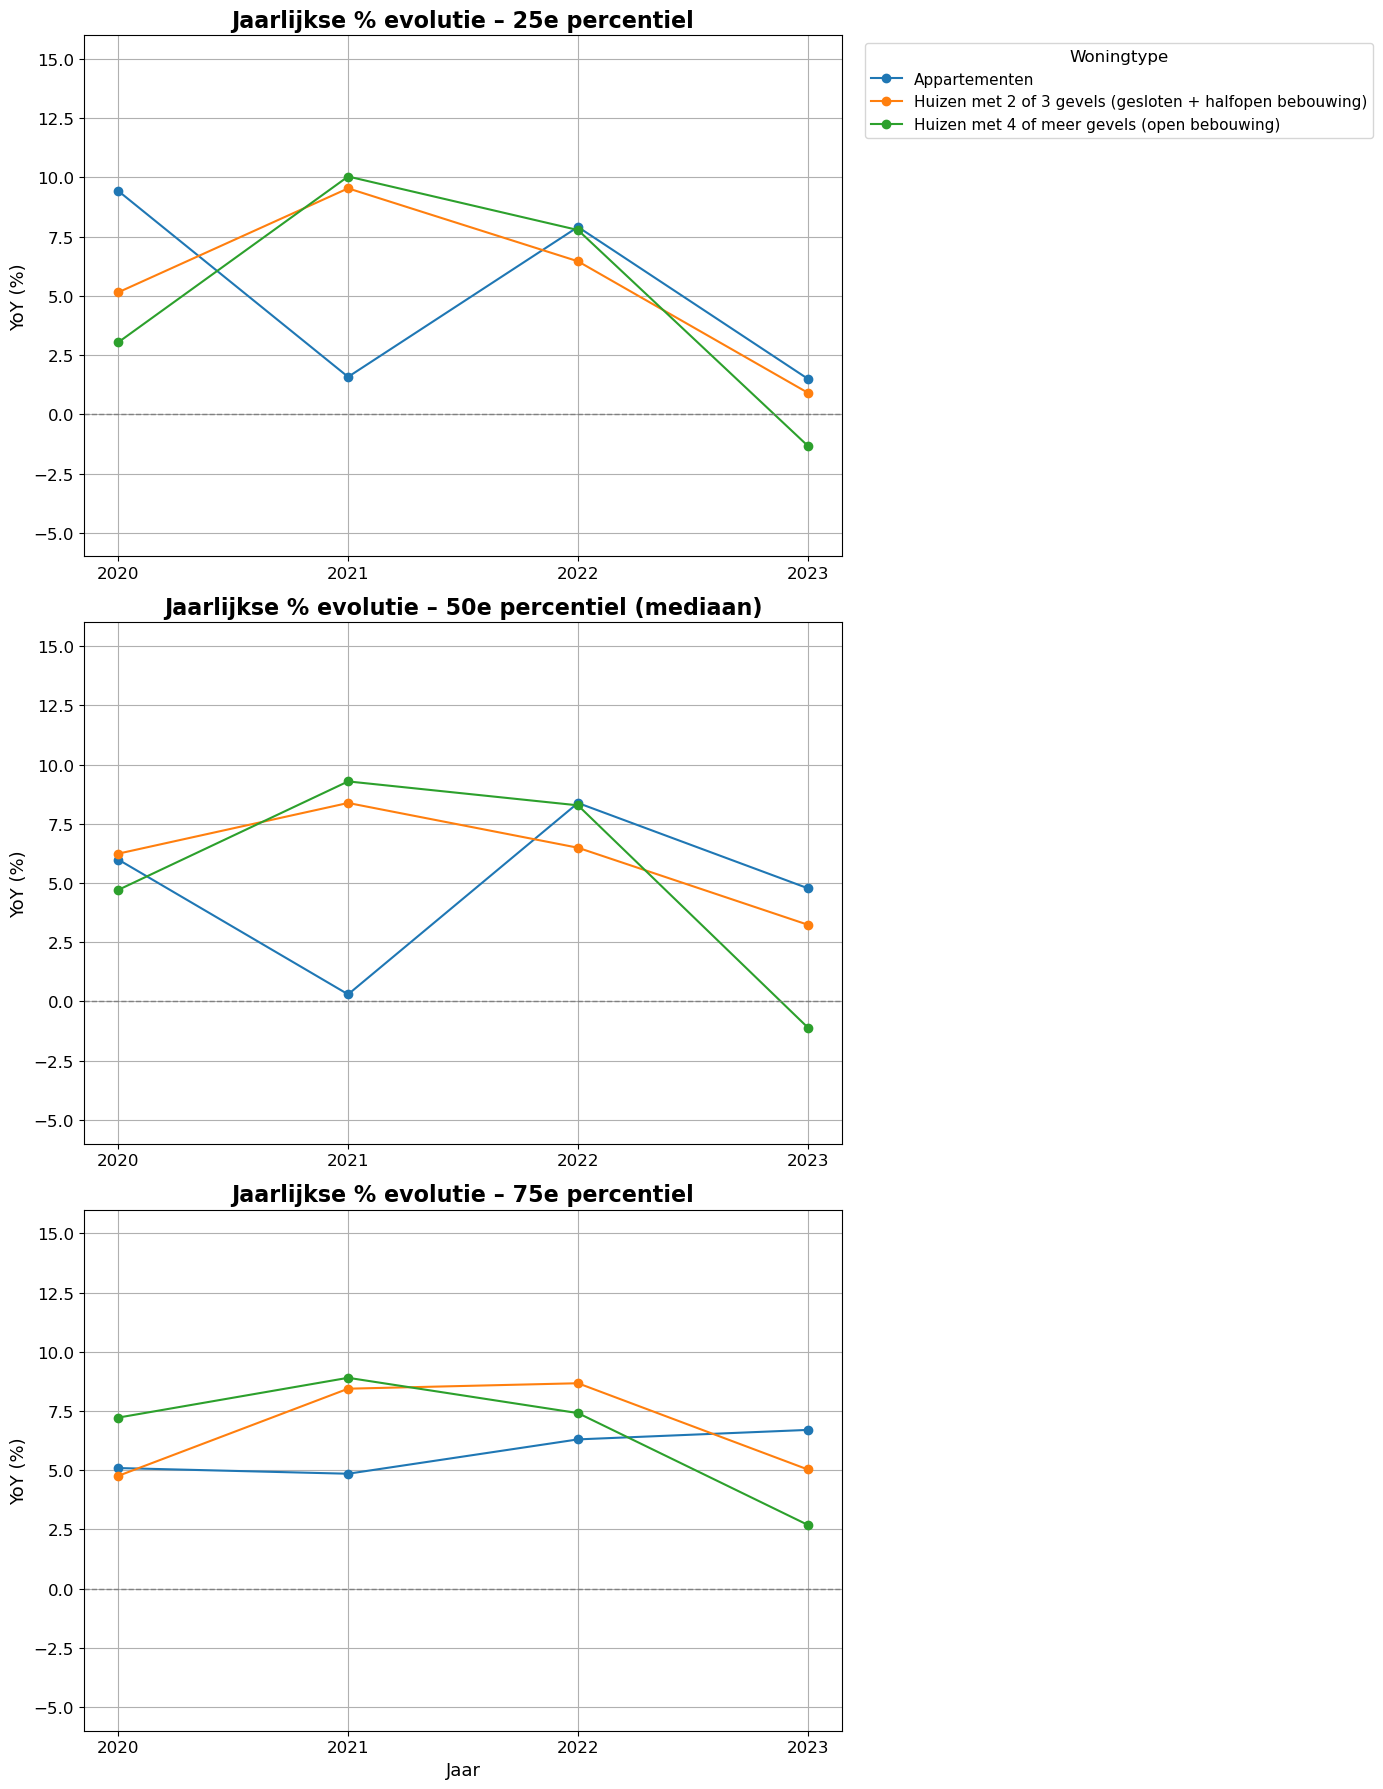

In [45]:
def plot_yoy_alle_percentielen(df_yoy):
    prijskolommen = ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']
    titels = ['25e percentiel', '50e percentiel (mediaan)', '75e percentiel']
    #maak een raster met 3 subplots, 3 rijen 1 kolom
    fig, axs = plt.subplots(3, 1, figsize=(14, 18))
    #voor elke index en prijspercentiel (25e, 50e, 75e) in prijskolommen
    for i, kolom in enumerate(prijskolommen):
        #bepaal de ax die je gaat gebruiken (ax = nummer index)
        ax = axs[i]
        #Maak de naam van de kolom om deze automatisch te kunnen selecteren. Dit zodat ik in 1 functie de 3 plots kan maken
        #En niet elk prijspercentiel apart moet aanroepen
        kol_yoy = f'YOY_{kolom}'

        #voor elk woningtype + groep van jaren
        for woningtype, groep in df_yoy.groupby('Woningtype_NL'):
            #verwijder jaren waarvoor geen waardes zijn (2019)
            groep = groep.dropna(subset=[kol_yoy])
            #Plot een lijn voor dit woningtype en bewaar het lijnobject om de kleur later te kunnen gebruiken (unpacking door gebruik van ,)
            lijn, = ax.plot(groep['Jaar'], groep[kol_yoy], marker='o', label=woningtype, color=kleuren.get(woningtype))
            #consistent kleurgebruik
            # kleuren['woningtype'] = kleur

        #Maak een nul-lijn
        ax.axhline(0, color='grey', linestyle='--', linewidth=1)
        #titels en assen instellen
        ax.set_title(f'Jaarlijkse % evolutie – {titels[i]}', fontsize=16, fontweight='bold')
        ax.set_ylabel('YoY (%)', fontsize=13)
        #schaal van de y-as voor de 3 plots gelijk maken
        ax.set_ylim(-6, 16)
        #Bepaal de unieke jaartallen waarvoor er een YOY-waarde bestaat
        jaren_met_yoy = df_yoy.dropna(subset= kol_yoy)['Jaar'].unique()
        #Gebruik die waardes als x_ticks zodat hij geen halve jaren weergeeft
        ax.set_xticks(sorted(jaren_met_yoy))
        ax.grid(True)
        ax.tick_params(axis='both', labelsize=12)

    #zet 1 label jaar op de x as van de laaste plot voor de 3 plots
    axs[-1].set_xlabel('Jaar', fontsize=13)
    #zet de legende rechts bovenaan
    axs[0].legend(title='Woningtype', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11, title_fontsize=12)

    plt.tight_layout()
    plt.savefig('plots/lijnplots jaarlijkse evolutie alle percentielen.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_yoy_alle_percentielen(df_yoy)

**Zelfde informatie in een barplot voor Prijs_50e_Percentiel**

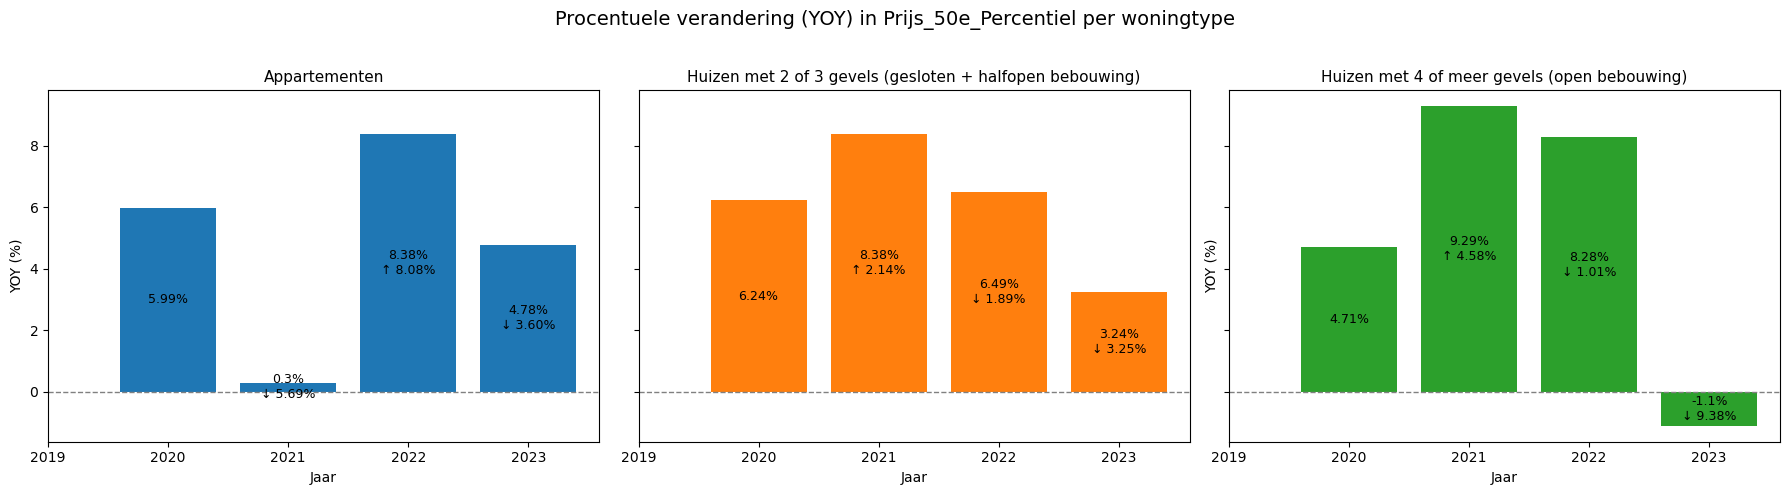

In [46]:
#Haal de unieke woningtypes op uit de kolom 'Woningtype_NL'
woningtypes = df_sorted_per_woningtype_jaar['Woningtype_NL'].unique()
#Maak een 1x3 raster van 3 lege grafieken met gedeelde y-as
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


#Loop over elke index en elk woningtype
for i, woningtype in enumerate(woningtypes):
    #Kies de subplot die overeenkomt met de index
    ax = axs[i]
    #filter de data voor het juiste woningtype
    data = df_sorted_per_woningtype_jaar[df_sorted_per_woningtype_jaar['Woningtype_NL'] == woningtype]
    
    #maak de barplots en verzamel de bars in een lijst
    bars = ax.bar(data['Jaar'], data['YOY'], color=kleuren[woningtype])
    
    #combineer elke bar met de juiste rij in data met zip
    for bar, (_, row) in zip(bars, data.iterrows()):
        #haal de hoogte op van de rij
        hoogte = row['YOY']
        #maak een label met de waarde van YOY%
        label = f"{row['YOY']}%"
        #als het yoy_verschil niet nul is positief symbool als yoy_vershil > 0, negatief symbool als yoy_verschil < 0
        if pd.notna(row['YOY_verschil']):
            symbool = '↑' if row['YOY_verschil'] > 0 else '↓'
            #Voeg het symbool en de absolute waarde van het verschil toe op een nieuwe regel. het symbool geeft de richting al aan vandaar absolute waarde
            label += f"\n{symbool} {abs(row['YOY_verschil']):.2f}%"
        #label plaatsen 
        ax.text(
            #zet het label in het midden van de balk
            bar.get_x() + bar.get_width() / 2,
            #zet het label halverwege de hoogte van de balk
            hoogte / 2,
            label,
            #Horizontaal en verticaal gecentreerd
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )
    #teken een nullijn
    ax.axhline(0, color='grey', linestyle='--', linewidth=1)
    #Titel en as-labels instellen
    ax.set_title(woningtype, fontsize=11)
    ax.set_xlabel("Jaar")
    #zet het Ylabel enkel aan de linkerkant
    if i % 2 == 0:
        ax.set_ylabel("YOY (%)")
    ax.set_xticks(data['Jaar'])
#hoofdtitel
fig.suptitle("Procentuele verandering (YOY) in Prijs_50e_Percentiel per woningtype", fontsize=14)
#Optimaliseer de layout en laat bovenaan wat ruimte voor de hoofdtitel
#rect = [left, bottom, right, top] → 0 = begin figuur, 1 = einde figuur
#Top = 0.96 → laat 4% ruimte bovenaan
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plots/barplot procentuele verandering (YOY) in Prijs_50e_Percentiel per woningtype', dpi=300, bbox_inches='tight')
plt.show()




**Plot: YOY-verandering in 25e, 50e en 75e percentiel per woningtype**

Ik zet het voorgaande plot om in een functie, zodat ik automatisch dit type visualisatie kan genereren voor elk van de drie prijspercentielen.

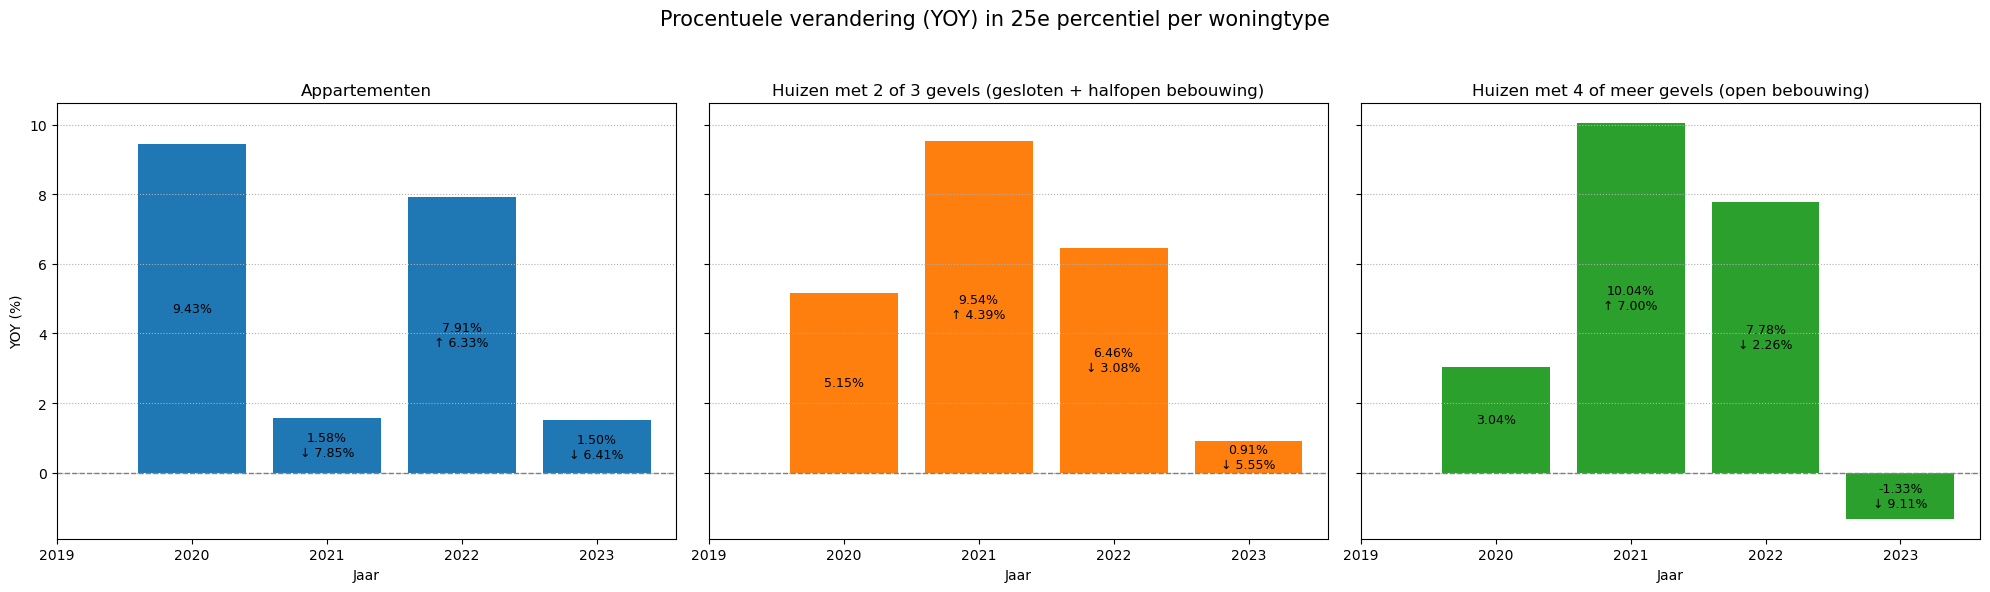

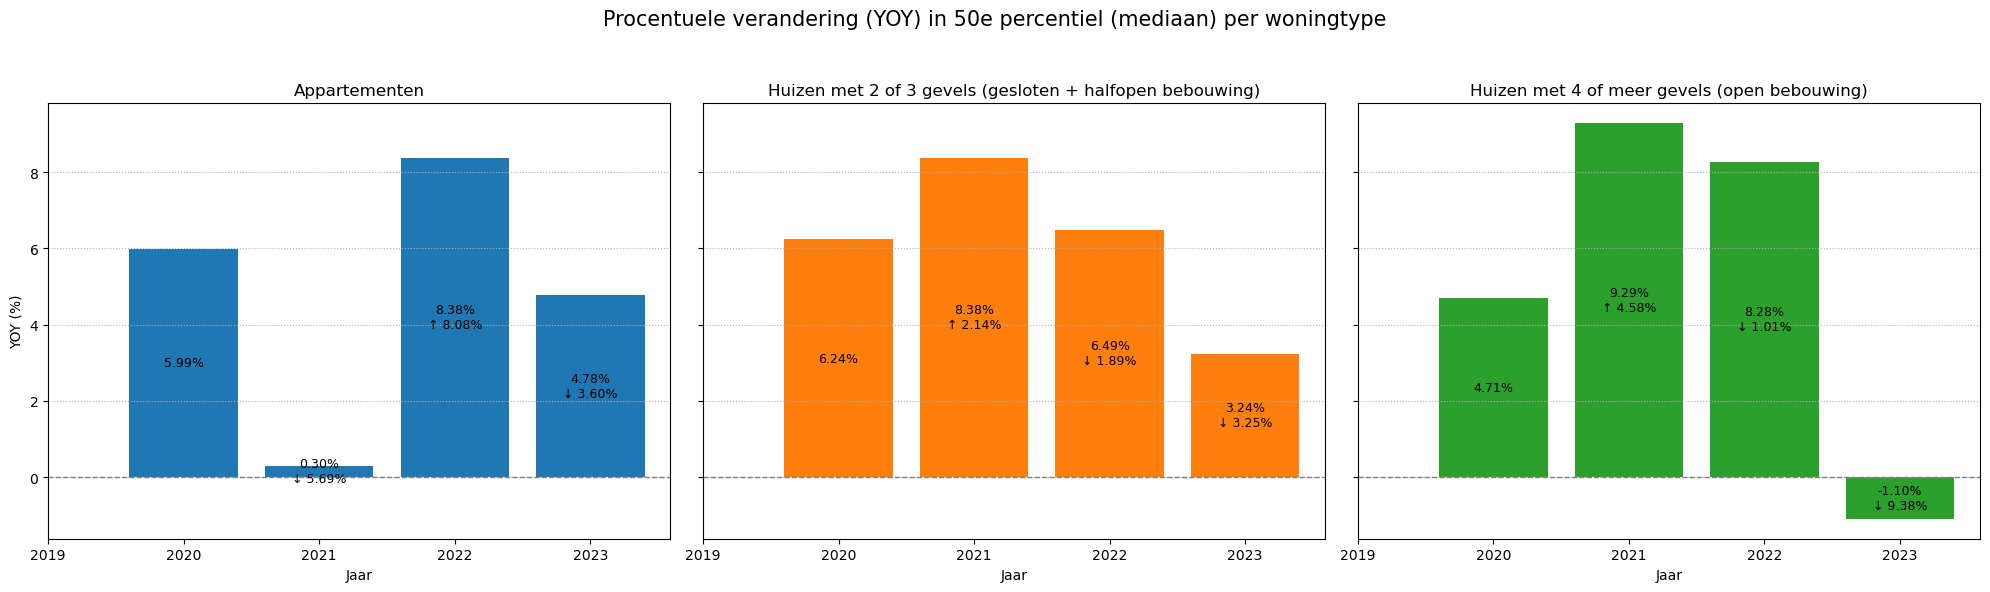

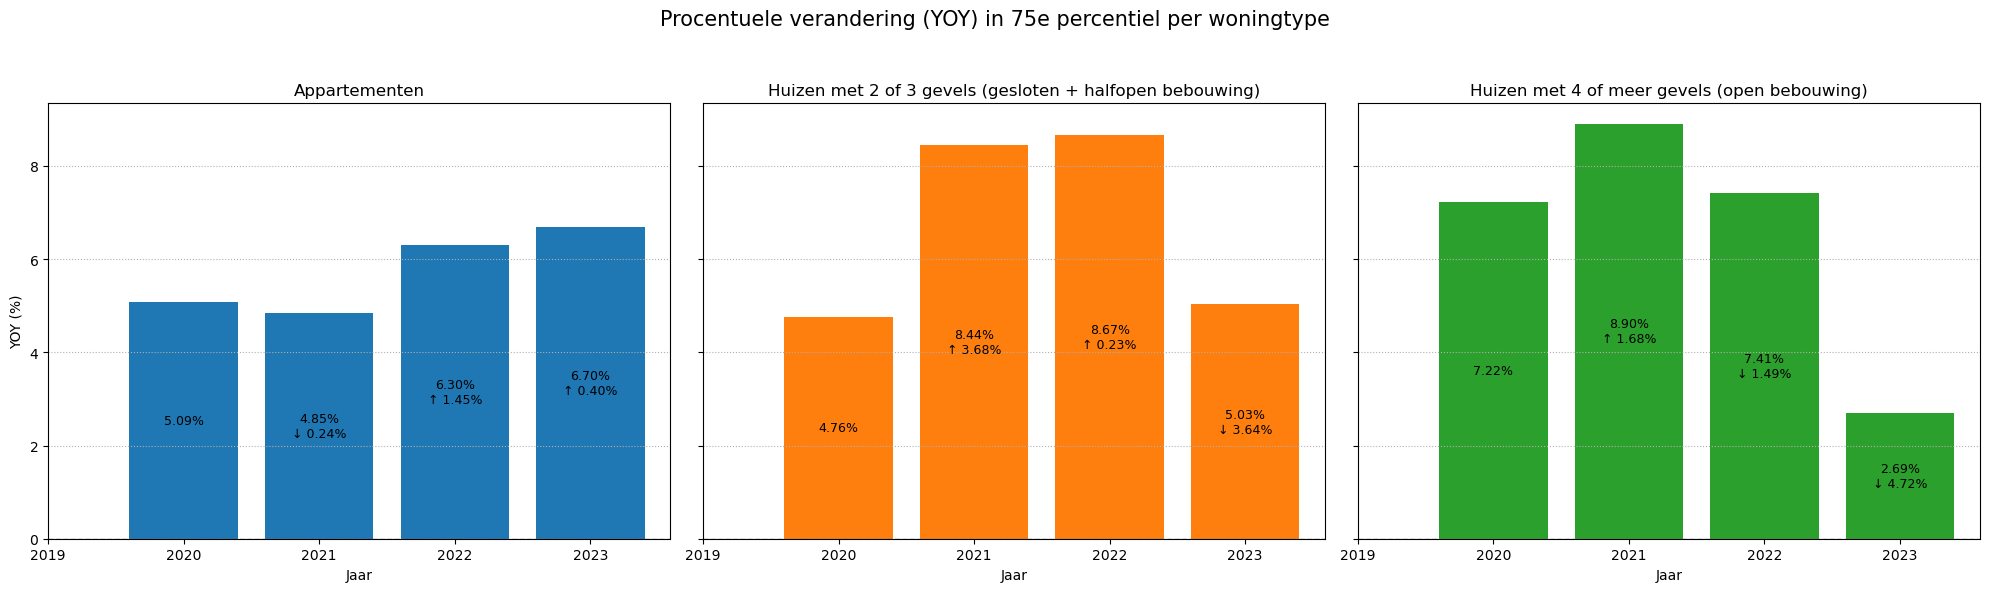

In [47]:
def plot_yoy_bars_alle_percentielen_per_woningtype(df, kleuren):
    prijskolommen = ['Prijs_25e_Percentiel', 'Prijs_50e_Percentiel', 'Prijs_75e_Percentiel']
    titels = ['25e percentiel', '50e percentiel (mediaan)', '75e percentiel']
    woningtypes = df['Woningtype_NL'].unique()

    #Voor elke index en bijhorende waarde uit de lijst prijskolommen
    for i, kolom in enumerate(prijskolommen):
        #maak de naam van kolom yoy om later aan te roepen
        kol_yoy = f'YOY_{kolom}'
        #Maak de naam van kolom yoy_verschil om later aan te roepen. Dit zodat ik in 1 functie de 3 plots kan maken
        #En niet elk prijspercentiel apart moet aanroepen
        kol_yoy_verschil = f'YOY_verschil_{kolom}'

        #maak een raster van 1 rij en 3 kolommen voor de plots, deze delen een y-as
        fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

        #Voor elke index en woningtype in de lijst woningtypes
        for j, woningtype in enumerate(woningtypes):
            #Kies het plot waarop je data wilt plaatsen
            ax = axs[j]
            #selecteer de juiste data uit df aan de hand van het woningtype
            data = df[df['Woningtype_NL'] == woningtype]
            #sla de bars op als een object in een list bars
            bars = ax.bar(data['Jaar'],data[kol_yoy],color=kleuren[woningtype])

             #combineer elke bar met de juiste rij in data met zip
            for bar, (_, row) in zip(bars, data.iterrows()):
                #Haal de hoogte op van de rij
                hoogte = row[kol_yoy]
                #Maak een label met de waarde van YOY
                label = f"{hoogte:.2f}%"
                #als het yoy_verschil niet nul is positief symbool als yoy_vershil > 0, negatief symbool als yoy_verschil < 0
                if pd.notna(row[kol_yoy_verschil]):
                    symbool = '↑' if row[kol_yoy_verschil] > 0 else '↓'
                    #Voeg het symbool en de absolute waarde van het verschil toe op een nieuwe regel. het symbool geeft de richting al aan vandaar absolute waarde
                    label += f"\n{symbool} {abs(row[kol_yoy_verschil]):.2f}%"
                #Voeg het label toe in het midden van de staaf
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    hoogte / 2,
                    label,
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='black'
                )
            #maak een nullijn    
            ax.axhline(0, color='grey', linestyle='--', linewidth=1)
            #Titels en assen instellen
            ax.set_title(woningtype, fontsize=12)
            ax.set_xlabel("Jaar")
            ax.set_xticks(data['Jaar'])
            #Enkel aan de linkerkant het label YOY(%) plaatsen
            if j == 0:
                ax.set_ylabel("YOY (%)")
                
            ax.grid(True, axis='y', linestyle=':')
        #Zet een hoofdtitel boven de volledige figuur, afhankelijk van het percentiel
        fig.suptitle(f"Procentuele verandering (YOY) in {titels[i]} per woningtype",fontsize=15)
        plt.tight_layout(rect=[0, 0, 1, 0.94])
        plt.savefig(f'plots/barplot_YOY_{kolom}.png', dpi=300, bbox_inches='tight')
        plt.show()

plot_yoy_bars_alle_percentielen_per_woningtype(df_yoy, kleuren)

**PLot per gemeente yoy-verandering in Prijs_50e_Percentiel tussen Q3 2024 en Q3 2023.**

Ik wil gaan kijken per gemeente wat de yoy verandering is in de mediaan prijs per gemeente.

Ik wil daarbij naar de meeste recente data kijken want die is het meest actueel maar voor Q4 in 2024 hadden we geen waardes en deze rijen zijn gewist uit de dataset.

Daarom kies ik ervoor om de waardes van Q3 2024 te gaan vergelijken met Q3 2023. 

**Conclusie**

Gesloten + halfopen bebouwing (oranje):

Sterke prijsstijgingen in sommige gemeenten:

- Duffel +30.83%, Bornem +23.67%, Putte +12.94%

Sterke dalingen:

- Nijlen -17.93%, Mechelen -9.85%

Zeer grote verschillen tussen gemeenten, wat op een hoge volatiliteit wijst voor dit woningtype.

Open bebouwing (groen):
Grote negatieve veranderingen in:

- Puurs-Sint-Amands -21.66%, Sint-Katelijne-Waver -21.57%

Sterke stijgingen elders:

- Putte +22.65%, Bonheiden +10.42%

Dit woningtype toont extreme regionale verschillen met een aantal heel sterke uitschieters.

Appartementen (blauw):

Wisselend beeld:

- Sterke stijging in Willebroek +15.69%

- Daling in Mechelen -16.39%, Bornem -10.16%

Hier is de spreiding kleiner dan bij huizen, maar nog steeds duidelijke regionale verschillen zichtbaar. Er is ook minder data.

De evolutie van woningprijzen tussen 2023 en 2024 is erg afhankelijk van locatie én woningtype.

Vooral gesloten/halfopen woningen en open bebouwing tonen sterke stijgingen of dalingen, afhankelijk van de gemeente.

Appartementen zijn iets minder volatiel, maar ook daar zijn duidelijke dalingen en stijgingen merkbaar.

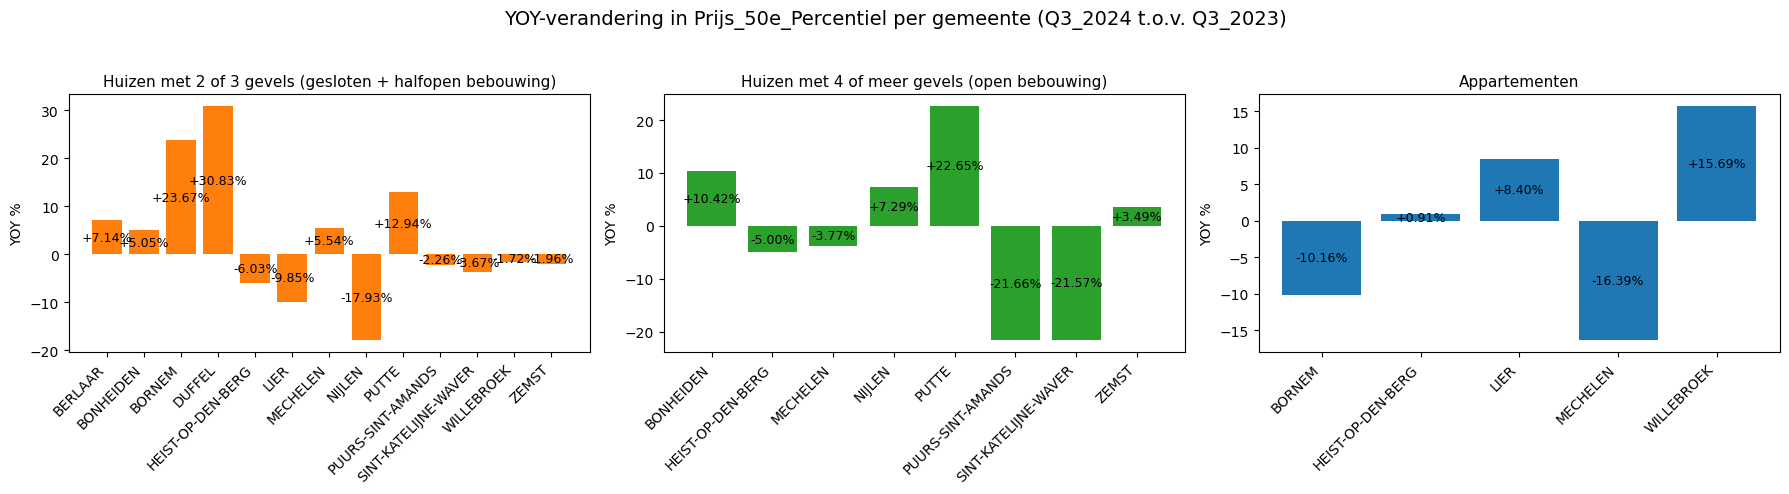

In [48]:
#filter de dataset op Q3 in 2023 en 2024
df_mechelen_q3 = df_mechelen_clean[
    (df_mechelen_clean['Periode'] == 'Q3') &
    (df_mechelen_clean['Jaar'].isin([2023, 2024]))
]

#Groepeer per gemeente, woningtype en jaar en neem het gemiddelde van de kolom Prijs_50e_Percentiel of de mediaan
grouped_per_gemeente = df_mechelen_q3.groupby(['Naam_NL', 'Woningtype_NL', 'Jaar'])['Prijs_50e_Percentiel'].mean().reset_index()

#Maak de kolommen met YOY en YOY verschil waardes
grouped_per_gemeente['YOY'] = (grouped_per_gemeente.groupby(['Naam_NL','Woningtype_NL'])['Prijs_50e_Percentiel'].pct_change()*100).round(2)
grouped_per_gemeente['YOY_verschil'] = grouped_per_gemeente.groupby(['Naam_NL','Woningtype_NL'])['YOY'].diff().round(2)
grouped_per_gemeente
#Filter op enkel 2024
gemeente_yoy_2024 = grouped_per_gemeente[grouped_per_gemeente['Jaar'] == 2024].copy()

#bepaal de woningtypes en zet ze in een lijst
woningtypes_gemeente = gemeente_yoy_2024['Woningtype_NL'].unique()
#Maak een raster van 1 rij en 3 kolommen voor de plots
fig, axs = plt.subplots(1,3, figsize = (18,5))

#Voor elke index en woningtype in de  lijst woningtypes_gemeente
for i , woningtype in enumerate(woningtypes_gemeente):
    #Kies het plot waarop je data wilt plaatsen
    ax = axs[i]
    #selecteer de juiste data uit df aan de hand van het woningtype
    data = gemeente_yoy_2024[gemeente_yoy_2024['Woningtype_NL'] == woningtype].copy()
    #maak de barobjecten en slaag ze op in een lijst
    bars = ax.bar(data['Naam_NL'], data['YOY'], color = kleuren[woningtype])
    #koppel het juiste barobject aan de juiste data
    for bar, (_, row) in zip(bars, data.iterrows()):
        #Haal de hoogte op van de rij
        hoogte = row['YOY']
        #maak een label met de waarde van YOY
        label = f"{hoogte:+.2f}%"  

        # yoy_verschil = row['YOY_verschil']
        # if pd.notna(yoy_verschil):
        #     symbool = '↑' if yoy_verschil > 0 else '↓'
        #     label += f"\n{symbool} {abs(yoy_verschil):.2f}%"

        
        #Voeg het label toe in het midden van de bar
        ax.text(
            bar.get_x()+ bar.get_width() / 2,
            bar.get_height() / 2,
            label,
            ha = 'center',
            va = 'center',
            fontsize = 9,
            color = 'black')
    #titels en assen instellen
    ax.set_title(woningtype, fontsize = 11)
    ax.set_xticks(range(len(data['Naam_NL'])))
    ax.set_xticklabels(data['Naam_NL'], rotation=45, ha='right')
    ax.set_ylabel('YOY %')
#Plaats een subtitel boven de figuur
fig.suptitle("YOY-verandering in Prijs_50e_Percentiel per gemeente (Q3_2024 t.o.v. Q3_2023)", fontsize = 14)
plt.savefig('plots/barplot YOY-verandering in Prijs_50e_Percentiel per gemeente (Q3_2024 t.o.v. Q3_2023).png', dpi=300, bbox_inches='tight')
plt.tight_layout(rect = [0,0,1,0.95])
            
plt.show()

**Toch Q1 tot Q3 vergelijken tussen 2023 en 2024.**

Ik kies ervoor om alle beschikbare kwartalen (Q1 t.e.m. Q3) van de meest recente jaren te vergelijken.

Deze bredere vergelijking geeft een stabieler en representatiever beeld dan een vergelijking op basis van slechts één kwartaal (zoals Q3).

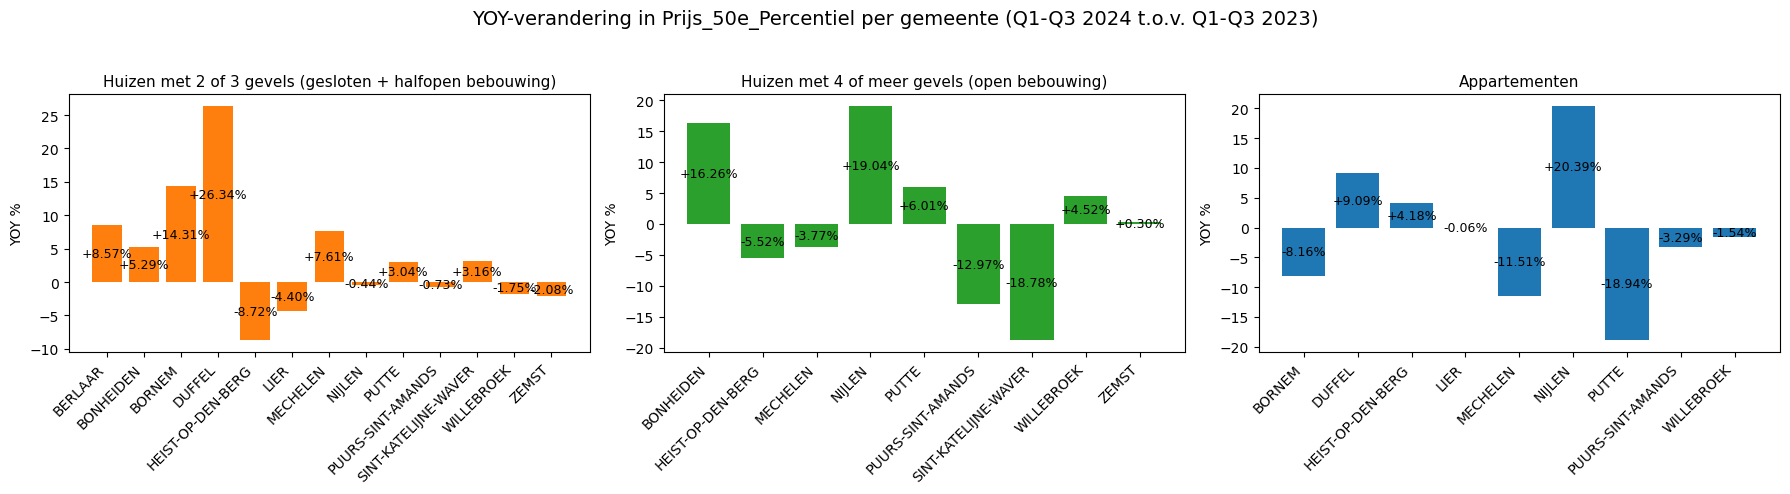

In [49]:
#Filter de dataset op Q1 t.e.m. Q3 in 2023 en 2024
df_mechelen_q1_q3 = df_mechelen_clean[
    (df_mechelen_clean['Periode'].isin(['Q1', 'Q2', 'Q3'])) &
    (df_mechelen_clean['Jaar'].isin([2023, 2024]))
]

#Groepeer per gemeente, woningtype en jaar en neem het gemiddelde van de kolom Prijs_50e_Percentiel
grouped_per_gemeente2 = df_mechelen_q1_q3.groupby(['Naam_NL', 'Woningtype_NL', 'Jaar'])['Prijs_50e_Percentiel'].mean().reset_index()

#Maak de kolommen met YOY en YOY verschil waardes
grouped_per_gemeente2['YOY'] = (grouped_per_gemeente2.groupby(['Naam_NL','Woningtype_NL'])['Prijs_50e_Percentiel'].pct_change()*100).round(2)
grouped_per_gemeente2['YOY_verschil'] = grouped_per_gemeente2.groupby(['Naam_NL','Woningtype_NL'])['YOY'].diff().round(2)

#Filter op enkel 2024
gemeente_yoy_2024_2 = grouped_per_gemeente2[grouped_per_gemeente2['Jaar'] == 2024].copy()

#Bepaal de woningtypes en zet ze in een lijst
woningtypes_gemeente = gemeente_yoy_2024_2['Woningtype_NL'].unique()

#Maak een raster van 1 rij en 3 kolommen voor de plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#Voor elke index en woningtype in de lijst woningtypes_gemeente
for i, woningtype in enumerate(woningtypes_gemeente):
    ax = axs[i]
    data = gemeente_yoy_2024_2[gemeente_yoy_2024_2['Woningtype_NL'] == woningtype].copy()
    bars = ax.bar(data['Naam_NL'], data['YOY'], color=kleuren[woningtype])
    
    for bar, (_, row) in zip(bars, data.iterrows()):
        hoogte = row['YOY']
        label = f"{hoogte:+.2f}%"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2,
            label,
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )
    
    ax.set_title(woningtype, fontsize=11)
    ax.set_xticks(range(len(data['Naam_NL'])))
    ax.set_xticklabels(data['Naam_NL'], rotation=45, ha='right')
    ax.set_ylabel('YOY %')

#Plaats een subtitel boven de figuur
fig.suptitle("YOY-verandering in Prijs_50e_Percentiel per gemeente (Q1-Q3 2024 t.o.v. Q1-Q3 2023)", fontsize=14)
plt.savefig('plots/barplot YOY-verandering in Prijs_50e_Percentiel per gemeente (Q1-Q3_2024 t.o.v. Q1-Q3_2023).png', dpi=300, bbox_inches='tight')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


**Controle op impact van imputatie op mijn analyse**

Tijdens het visualiseren van de resultaten merkte ik dat er in sommige gemeentes en woningtypes grote jaarlijkse sprongen voorkwamen. Dat deed me afvragen of de imputatie van missende waarden (via forward- en backward fill, deels op basis van semesterwaarden) de data mogelijk verstoord heeft.

Om dit te controleren heb ik gefilterd op een paar specifieke gevallen waarvan ik vermoedde dat ze veel missende waarden bevatten, namelijk:

Gemeentes: 'DUFFEL' en 'BORNEM'

Woningtypes: 'Appartementen' en 'Huizen met 4 of meer gevels (open bebouwing)'

Zo kon ik na de fill de originele en ingevulde waarden naast elkaar leggen en de impact inschatten.

**Conclusie**

De vergelijking toont dat sommige kwartaalwaarden volledig ontbraken en ingevuld zijn met data uit semesters. Daardoor kunnen de jaarlijkse verschillen soms overdreven zijn.

Toch blijft de algemene trend per woningtype en gemeente betrouwbaar. De exacte percentages zijn dus met wat voorzichtigheid te bekijken, maar de richting en de verschillen blijven relevant voor de analyse.

In [50]:
gemeentes = ['DUFFEL', 'BORNEM']
woningtypes = ['Appartementen', 'Huizen met 4 of meer gevels (open bebouwing)']
not_filled = df_mechelen_no_fill[
    (df_mechelen_no_fill['periode_type'] == 'Kwartaal') &
    (df_mechelen_no_fill['Naam_NL'].isin(gemeentes)) &
    (df_mechelen_no_fill['Woningtype_NL'].isin(woningtypes)) &
    (df_mechelen_no_fill['Jaar'].between(2019, 2024))
].copy()
filled = df_mechelen[(df_mechelen['periode_type'] == 'Kwartaal') &
    (df_mechelen['Naam_NL'].isin(gemeentes)) &
    (df_mechelen['Woningtype_NL'].isin(woningtypes)) &
    (df_mechelen['Jaar'].between(2019, 2024))
].copy()
#display(filled)

vergelijking = not_filled.merge(
    filled,
    on=['Jaar', 'Periode', 'Woningtype_NL', 'Naam_NL'],
    suffixes=('_not_filled', '_filled')
)[['Jaar', 'Periode', 'Woningtype_NL', 'Naam_NL', 'Prijs_50e_Percentiel_not_filled', 'Prijs_50e_Percentiel_filled']]
vergelijking

,Jaar,Periode,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel_not_filled,Prijs_50e_Percentiel_filled
0,2019,Q1,Huizen met 4 of meer gevels (open bebouwing),BORNEM,NaN,349000.0
1,2019,Q2,Huizen met 4 of meer gevels (open bebouwing),BORNEM,NaN,349000.0
2,2019,Q3,Huizen met 4 of meer gevels (open bebouwing),BORNEM,NaN,349000.0
3,2019,Q4,Huizen met 4 of meer gevels (open bebouwing),BORNEM,349000.0,349000.0
4,2019,Q1,Huizen met 4 of meer gevels (open bebouwing),DUFFEL,NaN,415000.0
...,...,...,...,...,...,...
80,2024,Q1,Appartementen,BORNEM,NaN,274000.0
81,2024,Q2,Appartementen,BORNEM,274000.0,274000.0
82,2024,Q3,Appartementen,BORNEM,NaN,274000.0
83,2024,Q1,Appartementen,DUFFEL,NaN,240000.0


**Plot Aantal transacties per woningtype per jaar**

Deze visualisatie toont het aandeel van het aantal vastgoedtransacties per woningtype, gegroepeerd per jaar.

Door een stacked bar chart te gebruiken, zie ik niet alleen het totaal per jaar, maar ook hoe de verhoudingen tussen woningtypes evolueren over de tijd.


**Conclusie**

- Gesloten + halfopen bebouwing (oranje):

Vormt elk jaar ruim de helft van de transacties.

Sterk gedaald in 2020 (corona?), daarna terug op niveau in 2022.

- Appartementen (blauw):
Stabiel aandeel van ongeveer een vijfde tot een kwart.

Licht herstel sinds 2020, maar minder sterk dan bij huizen.

- Open bebouwing (groen):
Blijft redelijk stabiel, met licht dalende trend in absolute aantallen.

In 2023 opnieuw lager dan in 2022.

Huizen met 2 of 3 gevels zijn het populairst en vormen de ruggengraat van de markt.

Appartementen blijven belangrijk, maar nemen geen duidelijk groter aandeel op.

Open bebouwing wordt relatief minder vaak verkocht, mogelijk door schaarste, prijs of veranderende woonbehoeften.


Woningtype_NL,Appartementen,Huizen met 2 of 3 gevels (gesloten + halfopen bebouwing),Huizen met 4 of meer gevels (open bebouwing)
Jaar,,,
2019,1062.0,3034.0,1051.0
2020,914.0,2168.0,807.0
2021,1170.0,2368.0,888.0
2022,1165.0,2851.0,1016.0
2023,1188.0,2362.0,879.0


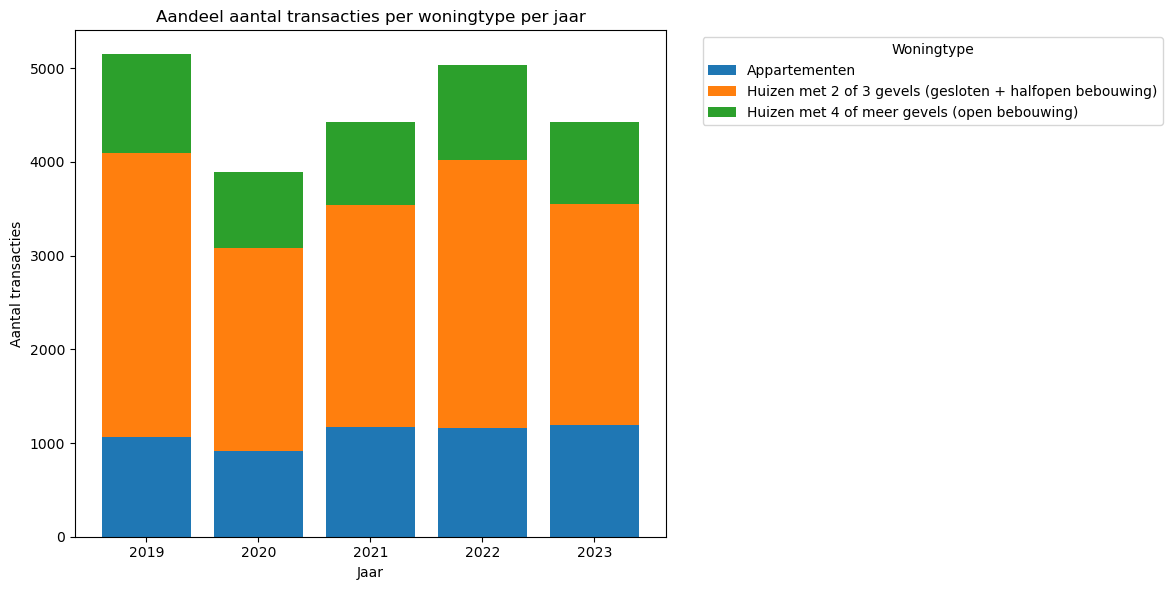

In [51]:
#Maak een dataframe met enkel het periode type jaar omdat we volledige jaren gaan bekijken
df_transacties = df_mechelen_clean[df_mechelen_clean['periode_type'] == 'Jaar']
#Groepeer per jaar en woningtype, en tel het aantal transacties per combinatie op
df_transacties_per_type = df_transacties.groupby(['Jaar', 'Woningtype_NL'])['Aantal_transacties'].sum().reset_index()
#pivot maken om een stacked barplot te kunnen maken
df_pivot = df_transacties_per_type.pivot(index='Jaar', columns='Woningtype_NL', values='Aantal_transacties')
display(df_pivot)

fig, ax = plt.subplots(figsize=(12, 6))

#Maak een array van 0 om de onderkant van elke bar te zijn , dus evenveel 0 als bars of jaren
#Deze array wordt per woningtype opgeteld zodat de lagen mooi op elkaar gestapeld worden
bottom = np.zeros(len(df_pivot))
#Maak een array met posities op de x-as, je gebruikt index om te beginnen vanaf positie 0
x = np.arange(len(df_pivot.index))

# Elke kolom (woningtype) als aparte laag stapelen
for woningtype in df_pivot.columns:
    #teken de bar op de x positie, met de waarde als hoogte en bottom als beginpunt
    ax.bar(x, df_pivot[woningtype], bottom=bottom, label=woningtype)
    #tel de waarde van het aantal transacties bij bottom zodat elke waarde boven de andere word gestapeld
    #Op deze manier schuift elke volgende laag omhoog, op basis van wat er al onder zit
    bottom += df_pivot[woningtype].values

#Titels en as instellen
ax.set_xticks(x)
ax.set_xticklabels(df_pivot.index)
ax.set_xlabel('Jaar')
ax.set_ylabel('Aantal transacties')
ax.set_title('Aandeel aantal transacties per woningtype per jaar')
ax.legend(title='Woningtype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/stackedbar Aandeel aantal transacties per woningtype per jaar.png',dpi=300, bbox_inches='tight')
plt.show()


**Plot transacties per jaar en transacties per gemeente**

ik wil nagaan welke woningtypes het meest verkocht worden per jaar en per gemeente

Vertrekken van df_transacties wat een dataframe is met alle rijen van het periode type jaar


**Conclusie**

- Aantal transacties per jaar (links):
Huizen met 2 of 3 gevels (oranje) blijven duidelijk het meest verkocht.

Sterke terugval in 2020.

Appartementen (blauw) stijgen licht sinds 2020.

Open bebouwing (groen) blijft relatief stabiel maar in kleinere aantallen.

- Aantal transacties per gemeente (rechts):
Mechelen springt eruit met veruit het grootste aantal transacties, voor alle woningtypes.

Daarna volgen Lier, Willebroek en Heist-op-den-Berg.

In Duffel, Bornem en Putte is het aantal transacties veel lager, maar wel gelijkmatiger verdeeld over woningtypes.

Huizen met 2 of 3 gevels domineren nog steeds de markt in elk jaar en in bijna elke gemeente.

De stad Mechelen vormt het hart van de vastgoedactiviteit in het arrondissement, gevolgd door enkele andere grotere gemeenten.

De spreiding per gemeente toont lokale verschillen in voorkeuren of aanbod per woningtype.







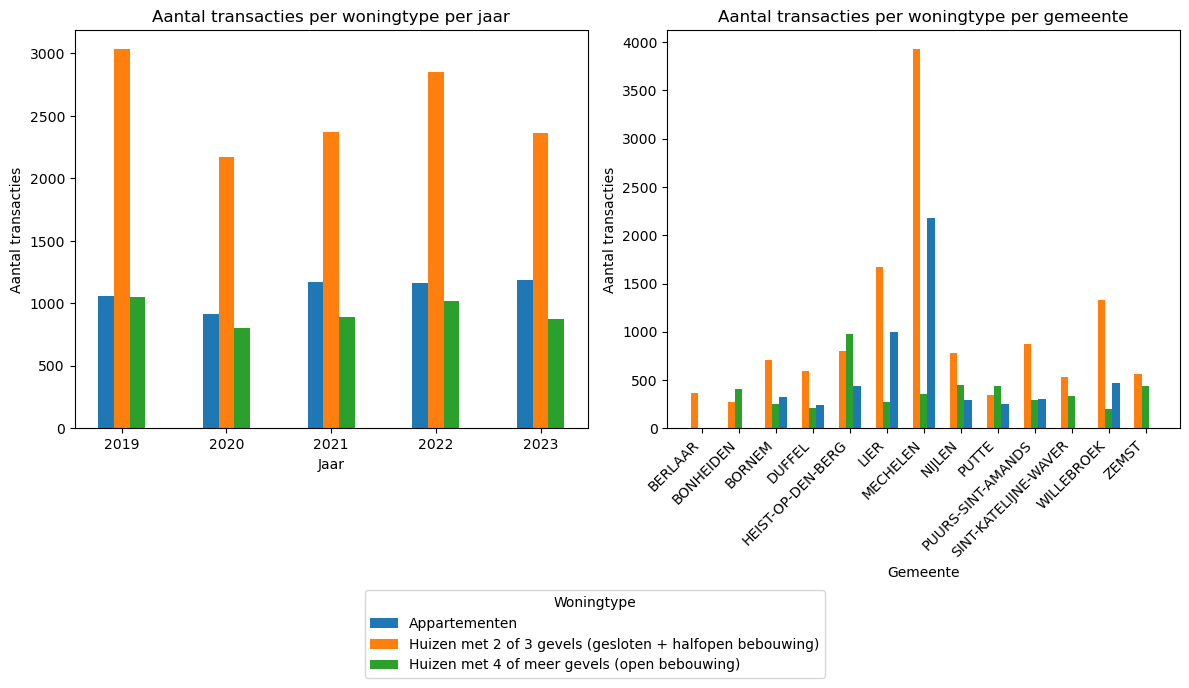

In [52]:
# Unieke jaren en woningtypes
def plot_transacties_per_jaar(ax, df, kleuren):
    #groeperen per jaar en woningtype geef de sum van het aantal transacties
    df_transacties_per_type = df.groupby(['Jaar', 'Woningtype_NL'])['Aantal_transacties'].sum().reset_index()
    #haal de jaren op en sorteer deze. Deze komen op de x-as.
    jaren = sorted(df_transacties_per_type['Jaar'].unique())
    #Haal de woningtypes op
    woningtypes = df_transacties_per_type['Woningtype_NL'].unique()

    #Barbreedte en positie-instellingen
    bar_width = 0.15
    x = np.arange(len(jaren))

    #Voor elke index en woningtype in de  lijst woningtypes
    for i, woningtype in enumerate(woningtypes):
        #maak een lege lijst met y-waarden om te vullen met aantal_transactie waardes
        y_values = []
        #Voor elk jaar het aantal transacties ophalen en toevoegen aan y_values
        for jaar in jaren:
            waarde = df_transacties_per_type.loc[
                (df_transacties_per_type['Jaar'] == jaar) &
                (df_transacties_per_type['Woningtype_NL'] == woningtype),
                'Aantal_transacties'
            ]
            y_values.append(waarde.values[0]) #Gebruik values om van een serie object naar een numerieke waarde te gaan om te kunnen plotten op een bar
        #Maak de bars
        ax.bar(x + i * bar_width, y_values, width=bar_width, label=woningtype, color=kleuren.get(woningtype))

    # titels en assen instellen
    ax.set_xlabel('Jaar')
    ax.set_ylabel('Aantal transacties')
    ax.set_title('Aantal transacties per woningtype per jaar')
    ax.set_xticks(x + bar_width * (len(woningtypes) - 1) / 2)
    ax.set_xticklabels(jaren)
    # ax.legend(title='Woningtype', bbox_to_anchor=(1.05, 1), loc='upper left')

def plot_transacties_per_gemeente(ax, df, kleuren):
    #groeperen per gemeente en woningtype geef de sum van het aantal transacties over alle jaren
    df_transacties_per_gemeente = df.groupby(['Naam_NL', 'Woningtype_NL'])['Aantal_transacties'].sum().reset_index()
    #haal de gemeentes op en sorteer deze. Deze komen op de x-as.
    gemeenten = sorted(df_transacties_per_gemeente['Naam_NL'].unique())
    #Haal de woningtypes op
    woningtypes = df_transacties_per_gemeente['Woningtype_NL'].unique()
    
    #Barbreedte en positie-instellingen
    bar_width = 0.2
    x = np.arange(len(gemeenten))

    #Voor elke index en woningtype in de  lijst woningtypes
    for i , woningtype in enumerate(woningtypes):
        #maak een lege lijst met y-waarden om te vullen met aantal_transactie waardes
        y_values = []
        #Voor elke gemeente het aantal transacties ophalen en toevoegen aan y_values
        for gemeente in gemeenten:
            waarde = df_transacties_per_gemeente.loc[(df_transacties_per_gemeente['Naam_NL'] == gemeente) &
            (df_transacties_per_gemeente['Woningtype_NL'] == woningtype),
            'Aantal_transacties']
            y_values.append(waarde.values[0] if not waarde.empty else 0)
         #Maak de bars   
        ax.bar(x + i * bar_width, y_values, width=bar_width, label=woningtype, color=kleuren.get(woningtype))
    #titels en as instellen
    ax.set_xticks(x + bar_width * (len(woningtypes) - 1) / 2)
    ax.set_xticklabels(gemeenten, rotation=45, ha='right')
    ax.set_xlabel("Gemeente")
    ax.set_ylabel("Aantal transacties")
    ax.set_title("Aantal transacties per woningtype per gemeente")
    

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_transacties_per_jaar(axs[0], df_transacties, kleuren)
plot_transacties_per_gemeente(axs[1], df_transacties, kleuren)
fig.legend(*axs[0].get_legend_handles_labels(),title='Woningtype',loc='lower center',bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
fig.savefig('plots/barplots aantal transacties per jaar en per gemeente.png', dpi=300, bbox_inches='tight')
plt.show()

**Prijs vs aantal transacties per woningtype**
    
Onderzoekt of duurdere woningen ook vaker (of net minder) verkocht worden

Inzichten uit scatterplot: Gemiddelde prijs vs aantal transacties

De scatterplot toont dat er geen positief verband is tussen de gemiddelde verkoopprijs en het aantal transacties per woningtype.

- Huizen met halfopen of gesloten bebouwing zijn veruit het populairst, met jaarlijks meer dan 2.000 transacties.
- Open bebouwing is het duurst, maar wordt het minst verkocht.
- Appartementen zijn gemiddeld het goedkoopst, maar ook hun transactievolume blijft relatief laag.

De middenklasse van woningen (halfopen/gesloten) blijkt dus het meest aantrekkelijk op de vastgoedmarkt in dit arrondissement, zowel qua prijs als verkoopaantallen.


,Jaar,Woningtype_NL,gemiddelde_prijs,aantal_transacties
0,2019,Appartementen,223492.777778,1062.0
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,249019.230769,3034.0
2,2019,Huizen met 4 of meer gevels (open bebouwing),361583.333333,1051.0
3,2020,Appartementen,236883.333333,914.0
4,2020,Huizen met 2 of 3 gevels (gesloten + halfopen ...,264569.230769,2168.0
5,2020,Huizen met 4 of meer gevels (open bebouwing),378625.000000,807.0
6,2021,Appartementen,237605.555556,1170.0
7,2021,Huizen met 2 of 3 gevels (gesloten + halfopen ...,286730.769231,2368.0
8,2021,Huizen met 4 of meer gevels (open bebouwing),413798.750000,888.0
9,2022,Appartementen,257527.777778,1165.0


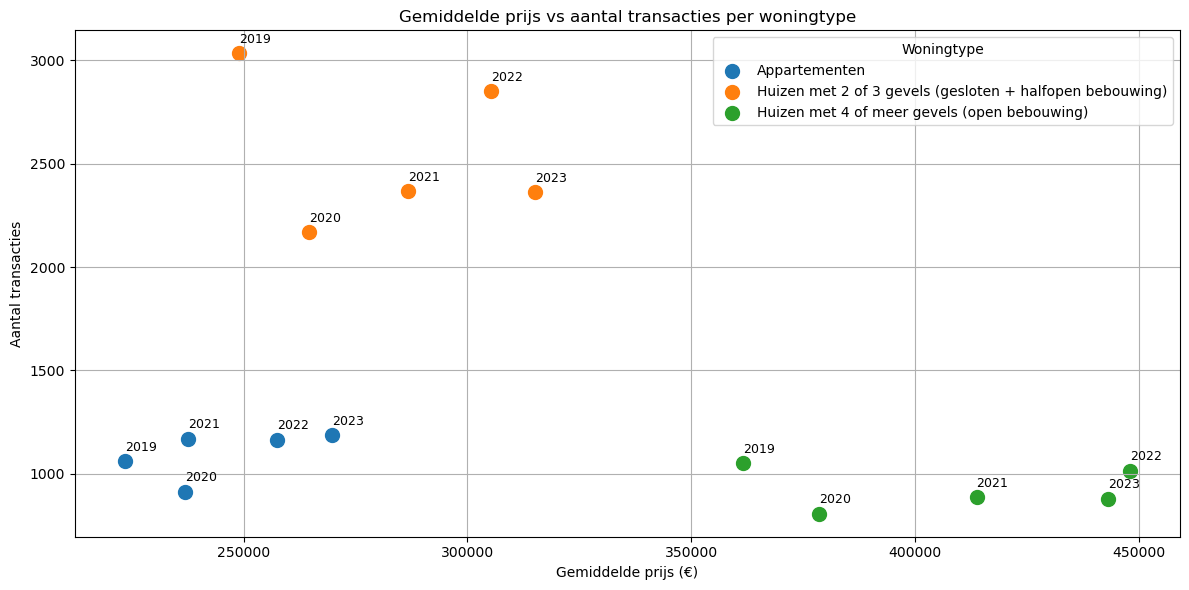

In [53]:
#Groepeer per jaar en woningtype en maak 2 kolommen met het gemiddelde en het aantal transacties
df_scatter = df_transacties.groupby(['Jaar', 'Woningtype_NL']).agg(gemiddelde_prijs = ('Prijs_50e_Percentiel', 'mean'), aantal_transacties = ('Aantal_transacties','sum')).reset_index()
display(df_scatter)

fig, ax  = plt.subplots(figsize = (12,6))
#Voor elk woningtype in de unieke woningtypes van df_scatter
for woningtype in df_scatter['Woningtype_NL'].unique():
    #filter de juiste data adh het woningtype
    subset = df_scatter[df_scatter['Woningtype_NL'] == woningtype]
    #Maak de scatter
    plt.scatter(subset['gemiddelde_prijs'], subset['aantal_transacties'],
              label = woningtype,s = 100)
    #for elke index in een range gelijk aan de lengte van de subset, zet een label naast het datapunt
    for i in range(len(subset)):
        plt.text(
        subset['gemiddelde_prijs'].iloc[i],
        subset['aantal_transacties'].iloc[i] + 50,
        str(subset['Jaar'].iloc[i]),
        fontsize=9
    )

plt.title('Gemiddelde prijs vs aantal transacties per woningtype')
plt.xlabel('Gemiddelde prijs (€)')
plt.ylabel('Aantal transacties')
plt.legend(title='Woningtype')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/scatterplot Gemiddelde prijs vs aantal transacties per woningtype.png',dpi=300, bbox_inches='tight')
plt.show()



**Gemiddelde mediaanprijs per jaar en woningtype**

Deze plot toont de gemiddelde mediaanprijs per jaar, uitgesplitst per woningtype (2019–2023). 

Het geeft een beeld van de prijsniveaus en hun evolutie.

**Conclusie**

Open bebouwing (groen) is veruit het duurst, met mediaanprijzen rond of boven de €400.000. De stijging is sterk tussen 2019 en 2022, met een kleine daling in 2023.

Huizen met 2 of 3 gevels (oranje) zitten in de middenmoot, met een consistente stijging tot ongeveer €315.000 in 2023.

Appartementen (blauw) zijn het goedkoopst, met een toename van ongeveer €225.000 naar €268.000.

Alle woningtypes tonen prijsstijging, vooral tussen 2019 en 2022.

In 2023 is er een lichte afvlakking of daling bij open bebouwing.

Er is een groot prijsverschil tussen verschillende woningtypes: een open bebouwing is gemiddeld bijna dubbel zo duur als een appartement.



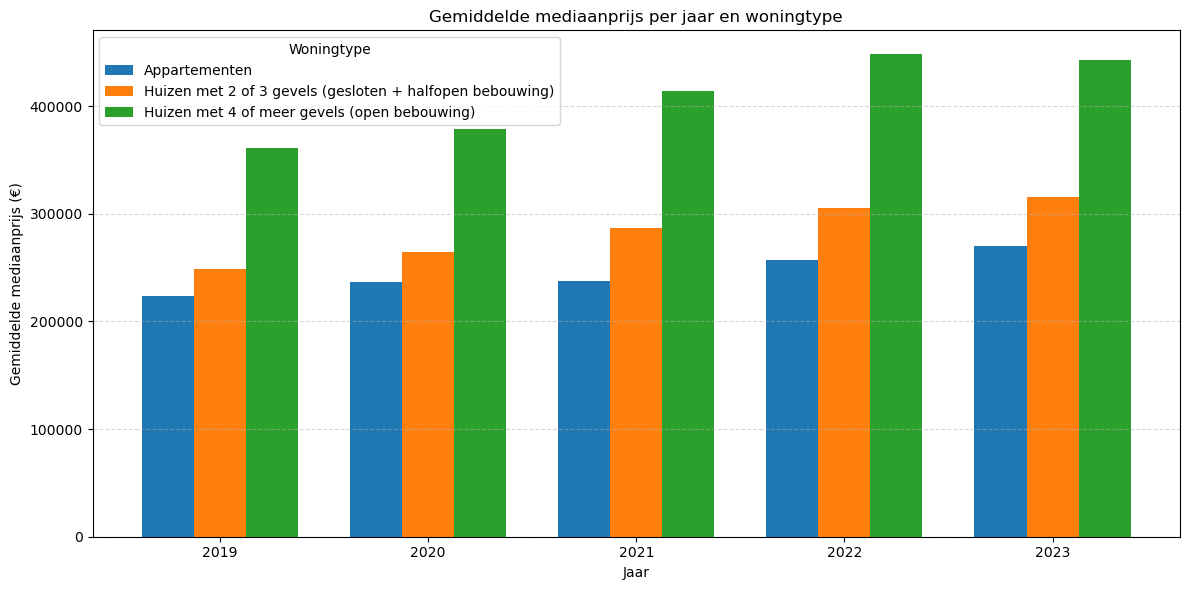

In [54]:
#Maak een nieuwe df met een duidelijke naam. Alle rijen van df_clean met een periodetype jaar.
df_mechelen_jaar = df_transacties.copy()
#Groepeer de dataframe per jaar en woningtype en neem het gemiddelde van de kolom prijs_50_percentiel.
df_mechelen_avg_jaar_woningtype = df_mechelen_jaar.groupby(['Jaar', 'Woningtype_NL']).agg(mediaanprijs = ('Prijs_50e_Percentiel', 'mean')).reset_index()
#bepaal de jaren en de woningtypes
jaren = sorted(df_mechelen_avg_jaar_woningtype['Jaar'].unique())
woningtypes = df_mechelen_avg_jaar_woningtype['Woningtype_NL'].unique()

#bar-instellingen
bar_width = 0.25
x = np.arange(len(jaren))


fig, ax = plt.subplots(figsize=(12, 6))

# Elke woningtype in woningtypes
for i, woningtype in enumerate(woningtypes):
    subset = df_mechelen_avg_jaar_woningtype[df_mechelen_avg_jaar_woningtype['Woningtype_NL'] == woningtype]
    prijzen = subset['mediaanprijs'].values
    ax.bar(x + i * bar_width, prijzen, width=bar_width, label=woningtype, color=kleuren.get(woningtype))

# titels en as instellingen
ax.set_xticks(x + bar_width)
ax.set_xticklabels(jaren)
ax.set_xlabel('Jaar')
ax.set_ylabel('Gemiddelde mediaanprijs (€)')
ax.set_title('Gemiddelde mediaanprijs per jaar en woningtype')
ax.legend(title='Woningtype')
ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.tight_layout()
plt.savefig('plots/barplot Gemiddelde mediaanprijs per jaar en woningtype.png',dpi=300, bbox_inches='tight')
plt.show()



In [55]:
df_2023_jaar = df_mechelen_clean[
    (df_mechelen_clean['periode_type'] == 'Jaar') &
    (df_mechelen_clean['Jaar'] == 2023)
]

# Gemiddelde mediaanprijs per gemeente
gemprijs_per_gemeente = df_2023_jaar.groupby(['Woningtype_NL','Naam_NL'])['Prijs_50e_Percentiel'].mean().reset_index()
gemprijs_per_gemeente
#Voor elke woningtype in gemprijs_per_gemeente bepaal de goedkoopste en duurste top 5.
for woningtype in gemprijs_per_gemeente['Woningtype_NL'].unique():
    subset = gemprijs_per_gemeente[gemprijs_per_gemeente['Woningtype_NL'] == woningtype]
    top5_duurste = subset.sort_values(by='Prijs_50e_Percentiel', ascending=False).head(5)
    top5_goedkoopste = subset.sort_values(by='Prijs_50e_Percentiel', ascending=True).head(5)
    display(f'Top5 duurste gemeenten per {woningtype} in 2023')
    display(top5_duurste)
    display(f'Top5 goedkoopste gemeenten per {woningtype} in 2023')
    display(top5_goedkoopste)

'Top5 duurste gemeenten per Appartementen in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
0,Appartementen,BORNEM,302500.0
4,Appartementen,MECHELEN,283500.0
6,Appartementen,PUTTE,280000.0
2,Appartementen,HEIST-OP-DEN-BERG,275000.0
7,Appartementen,PUURS-SINT-AMANDS,274000.0


'Top5 goedkoopste gemeenten per Appartementen in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
1,Appartementen,DUFFEL,239000.0
8,Appartementen,WILLEBROEK,250000.0
3,Appartementen,LIER,261000.0
5,Appartementen,NIJLEN,263500.0
7,Appartementen,PUURS-SINT-AMANDS,274000.0


'Top5 duurste gemeenten per Huizen met 2 of 3 gevels (gesloten + halfopen bebouwing) in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
21,Huizen met 2 of 3 gevels (gesloten + halfopen ...,ZEMST,363000.0
10,Huizen met 2 of 3 gevels (gesloten + halfopen ...,BONHEIDEN,335336.0
19,Huizen met 2 of 3 gevels (gesloten + halfopen ...,SINT-KATELIJNE-WAVER,335000.0
18,Huizen met 2 of 3 gevels (gesloten + halfopen ...,PUURS-SINT-AMANDS,330000.0
15,Huizen met 2 of 3 gevels (gesloten + halfopen ...,MECHELEN,329000.0


'Top5 goedkoopste gemeenten per Huizen met 2 of 3 gevels (gesloten + halfopen bebouwing) in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
11,Huizen met 2 of 3 gevels (gesloten + halfopen ...,BORNEM,280750.0
20,Huizen met 2 of 3 gevels (gesloten + halfopen ...,WILLEBROEK,288250.0
9,Huizen met 2 of 3 gevels (gesloten + halfopen ...,BERLAAR,290000.0
17,Huizen met 2 of 3 gevels (gesloten + halfopen ...,PUTTE,298001.0
14,Huizen met 2 of 3 gevels (gesloten + halfopen ...,LIER,303500.0


'Top5 duurste gemeenten per Huizen met 4 of meer gevels (open bebouwing) in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
30,Huizen met 4 of meer gevels (open bebouwing),PUURS-SINT-AMANDS,528750.0
27,Huizen met 4 of meer gevels (open bebouwing),MECHELEN,495000.0
26,Huizen met 4 of meer gevels (open bebouwing),LIER,490000.0
31,Huizen met 4 of meer gevels (open bebouwing),SINT-KATELIJNE-WAVER,490000.0
22,Huizen met 4 of meer gevels (open bebouwing),BONHEIDEN,485000.0


'Top5 goedkoopste gemeenten per Huizen met 4 of meer gevels (open bebouwing) in 2023'

,Woningtype_NL,Naam_NL,Prijs_50e_Percentiel
25,Huizen met 4 of meer gevels (open bebouwing),HEIST-OP-DEN-BERG,355000.0
29,Huizen met 4 of meer gevels (open bebouwing),PUTTE,360000.0
28,Huizen met 4 of meer gevels (open bebouwing),NIJLEN,384000.0
24,Huizen met 4 of meer gevels (open bebouwing),DUFFEL,421900.0
32,Huizen met 4 of meer gevels (open bebouwing),WILLEBROEK,422500.0


In [56]:
gdf = gpd.read_file('data/BELGIUM_-_Municipalities.geojson')
result_gdf = inspect_df(gdf)
print(gdf.columns)
print(gdf.crs)
gdf['CODE_INS'] = gdf['CODE_INS'].astype(int)
display(gdf.info())

Eerste 10 rijen


,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.3576, 4..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.1902, 4..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.4835 51.20315, 4.48354 51.20314, 4..."
5,6,BRASSCHAAT,BRASSCHAAT,BRASSCHAAT,Brasschaat,11008,11,"POLYGON ((4.52937 51.34448, 4.52963 51.34432, ..."
6,7,BRECHT,BRECHT,BRECHT,Brecht,11009,11,"POLYGON ((4.71689 51.3823, 4.71701 51.38169, 4..."
7,8,EDEGEM,EDEGEM,EDEGEM,Edegem,11013,11,"POLYGON ((4.43747 51.17055, 4.43816 51.17009, ..."
8,9,ESSEN,ESSEN,ESSEN,Essen,11016,11,"POLYGON ((4.54148 51.47942, 4.54473 51.47644, ..."
9,10,HEMIKSEM,HEMIKSEM,HEMIKSEM,Hemiksem,11018,11,"POLYGON ((4.33558 51.16041, 4.33563 51.1604, 4..."


Informatie over de dataset:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  589 non-null    int32   
 1   ADMUNAFR  589 non-null    object  
 2   ADMUNADU  589 non-null    object  
 3   ADMUNAGE  589 non-null    object  
 4   Communes  589 non-null    object  
 5   CODE_INS  589 non-null    object  
 6   arrond    589 non-null    object  
 7   geometry  589 non-null    geometry
dtypes: geometry(1), int32(1), object(6)
memory usage: 34.6+ KB
Samenvattende statistieken:


,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
count,589.000000,589,589,589,589,589,589,589
unique,NaN,588,589,589,588,589,43,589
top,NaN,SAINT-NICOLAS,VIROINVAL,VIROINVAL,Saint-Nicolas,93090,23,"POLYGON ((4.63224951466594 51.291975033626, 4...."
freq,NaN,2,1,1,2,1,35,1
mean,295.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,170.173931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,295.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing_values,missing_percentage
OBJECTID,0,0.0
ADMUNAFR,0,0.0
ADMUNADU,0,0.0
ADMUNAGE,0,0.0
Communes,0,0.0
CODE_INS,0,0.0
arrond,0,0.0
geometry,0,0.0


Index(['OBJECTID', 'ADMUNAFR', 'ADMUNADU', 'ADMUNAGE', 'Communes', 'CODE_INS',
       'arrond', 'geometry'],
      dtype='object')
EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  589 non-null    int32   
 1   ADMUNAFR  589 non-null    object  
 2   ADMUNADU  589 non-null    object  
 3   ADMUNAGE  589 non-null    object  
 4   Communes  589 non-null    object  
 5   CODE_INS  589 non-null    int64   
 6   arrond    589 non-null    object  
 7   geometry  589 non-null    geometry
dtypes: geometry(1), int32(1), int64(1), object(5)
memory usage: 34.6+ KB


None

In [57]:
# df_mechelen_clean.columns
NIS_codes_mechelen_clean = df_mechelen_clean['NIS-code'].unique()
gdf_filtered = gdf[gdf['CODE_INS'].isin(NIS_codes_mechelen_clean)][['ADMUNAGE', 'CODE_INS', 'geometry']]
display(gdf_filtered)

#Verander de naam van de kolom met de gemeente
gdf_filtered = gdf_filtered.rename(columns={'ADMUNAGE': 'Naam_NL'})
display(gdf_filtered)

,ADMUNAGE,CODE_INS,geometry
30,BERLAAR,12002,"POLYGON ((4.67197 51.13234, 4.67242 51.13212, ..."
31,BONHEIDEN,12005,"POLYGON ((4.53076 51.04583, 4.53077 51.04582, ..."
32,BORNEM,12007,"POLYGON ((4.3078 51.12515, 4.30829 51.12282, 4..."
33,DUFFEL,12009,"POLYGON ((4.50205 51.11624, 4.50224 51.11622, ..."
34,HEIST-OP-DEN-BERG,12014,"POLYGON ((4.71389 51.12605, 4.71398 51.12593, ..."
35,LIER,12021,"POLYGON ((4.56493 51.16469, 4.565 51.16451, 4...."
36,MECHELEN,12025,"POLYGON ((4.44483 51.07341, 4.44567 51.0728, 4..."
37,NIJLEN,12026,"POLYGON ((4.66367 51.18109, 4.66378 51.18106, ..."
38,PUTTE,12029,"POLYGON ((4.61422 51.08581, 4.61422 51.0858, 4..."
41,SINT-KATELIJNE-WAVER,12035,"POLYGON ((4.53624 51.08888, 4.53659 51.08859, ..."


,Naam_NL,CODE_INS,geometry
30,BERLAAR,12002,"POLYGON ((4.67197 51.13234, 4.67242 51.13212, ..."
31,BONHEIDEN,12005,"POLYGON ((4.53076 51.04583, 4.53077 51.04582, ..."
32,BORNEM,12007,"POLYGON ((4.3078 51.12515, 4.30829 51.12282, 4..."
33,DUFFEL,12009,"POLYGON ((4.50205 51.11624, 4.50224 51.11622, ..."
34,HEIST-OP-DEN-BERG,12014,"POLYGON ((4.71389 51.12605, 4.71398 51.12593, ..."
35,LIER,12021,"POLYGON ((4.56493 51.16469, 4.565 51.16451, 4...."
36,MECHELEN,12025,"POLYGON ((4.44483 51.07341, 4.44567 51.0728, 4..."
37,NIJLEN,12026,"POLYGON ((4.66367 51.18109, 4.66378 51.18106, ..."
38,PUTTE,12029,"POLYGON ((4.61422 51.08581, 4.61422 51.0858, 4..."
41,SINT-KATELIJNE-WAVER,12035,"POLYGON ((4.53624 51.08888, 4.53659 51.08859, ..."


In [58]:
df_mechelen_clean

,Jaar,Woningtype_NL,Woningtype_FR,NIS-code,Naam_NL,Naam_FR,Periode,CD_CLASS_SURFACE,Aantal_transacties,Prijs_25e_Percentiel,Prijs_50e_Percentiel,Prijs_75e_Percentiel,Geografisch_Niveau,periode_type
0,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q1,totaal / total,15.0,185750.0,285000.0,332500.0,5,Kwartaal
1,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q2,totaal / total,16.0,185750.0,285000.0,332500.0,5,Kwartaal
2,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q3,totaal / total,14.0,185750.0,285000.0,332500.0,5,Kwartaal
3,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,Q4,totaal / total,37.0,200000.0,232000.0,289000.0,5,Kwartaal
4,2019,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,12002,BERLAAR,BERLAAR,S1,totaal / total,31.0,159000.0,235000.0,305000.0,5,Semester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2024,Appartementen,Appartements,12040,WILLEBROEK,WILLEBROEK,Q3,totaal / total,28.0,223750.0,295000.0,333000.0,5,Kwartaal
2019,2024,Appartementen,Appartements,12040,WILLEBROEK,WILLEBROEK,S1,totaal / total,54.0,185000.0,230000.0,260000.0,5,Semester
2020,2024,Appartementen,Appartements,12041,PUURS-SINT-AMANDS,PUURS-SINT-AMANDS,Q1,totaal / total,18.0,200000.0,245000.0,342500.0,5,Kwartaal
2021,2024,Appartementen,Appartements,12041,PUURS-SINT-AMANDS,PUURS-SINT-AMANDS,Q2,totaal / total,9.0,200000.0,245000.0,342500.0,5,Kwartaal


**Kaart visual 1**

  Deze kaart toont de YOY-verandering (jaar-op-jaar) in de mediaanprijs per gemeente voor Q3 2024 t.o.v. Q3 2023, dus de procentuele stijging of daling van de mediane verkoopprijs per gemeente.

<class 'geopandas.geodataframe.GeoDataFrame'>


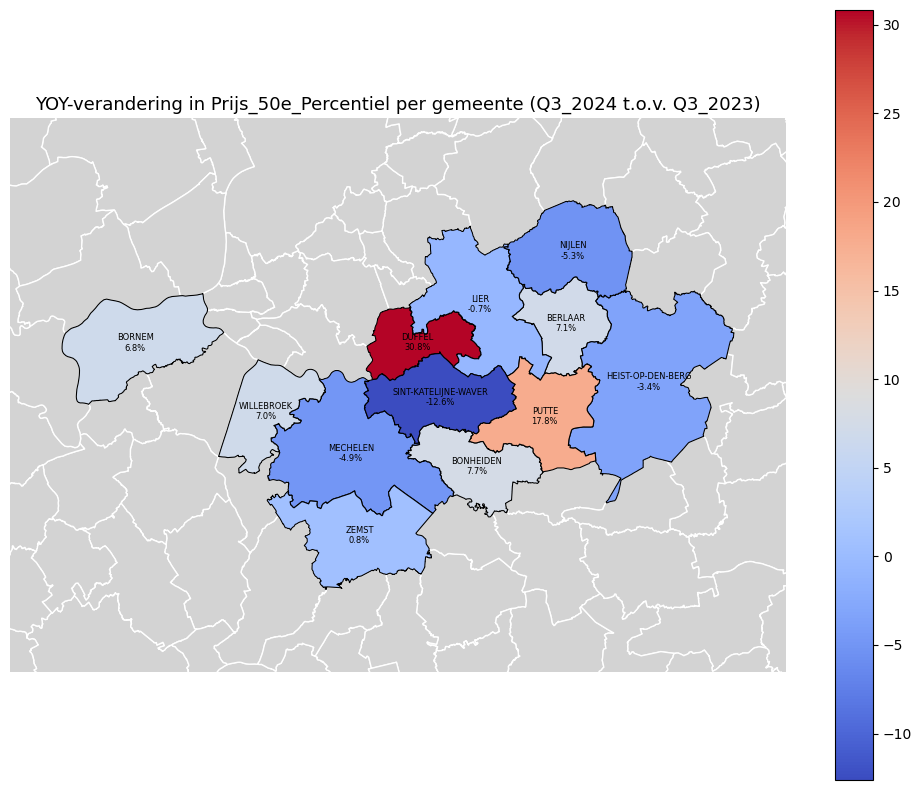

In [59]:
#we vertrekken van dataframe gemeente_yoy_2024 die reeds per woningtype de yoy bevat voor alle gemeentes tussen Q3 2024 en Q3 2023.
#Deze groeperen tot het gemiddelde over alle woningtypes heen
df_kaart = gemeente_yoy_2024.groupby('Naam_NL').agg({'YOY': 'mean'}).reset_index()
#mergen met de geo data
merged_df_kaart = df_kaart.merge(gdf_filtered, on = 'Naam_NL')
#omzetten in de geo dataframe
merged_df_kaart = gpd.GeoDataFrame(merged_df_kaart, geometry='geometry', crs="EPSG:4326")
#nakijken of merged_df_kaart een geo dataframe is 
print(type(merged_df_kaart))

fig, ax = plt.subplots(figsize=(10, 8))

#plot Belgie als achtergrond
gdf.plot(ax=ax, color='lightgrey', edgecolor='white')

#plot de gemeenten
merged_df_kaart.plot(
    column='YOY',
    cmap='coolwarm',
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax
)

#Labels met naam van de gemeenten en de YOY waarde toevoegen
for idx, row in merged_df_kaart.iterrows():
    centroid = row['geometry'].centroid
    tekst = f"{row['Naam_NL']}\n{row['YOY']:.1f}%"
    ax.text(centroid.x, centroid.y, tekst,
            ha='center', va='center', fontsize=6, color='black')

#Door heel belgie te plotten is het gebied dat ik wil bekijken te klein dus ik zoom in op het gekleurde gebied
bounds = merged_df_kaart.total_bounds
ax.set_xlim(bounds[0] - 0.05, bounds[2] + 0.05)
ax.set_ylim(bounds[1] - 0.05, bounds[3] + 0.05)


ax.set_title('YOY-verandering in Prijs_50e_Percentiel per gemeente (Q3_2024 t.o.v. Q3_2023)', fontsize=13)
ax.axis('off')
plt.tight_layout()
plt.savefig('plots/kaart YOY-verandering in Prijs_50e_Percentiel per gemeente (Q3_2024 t.o.v. Q3_2023).png',dpi=300, bbox_inches='tight')
plt.show()



**Kaart visual 2**

  Deze kaart toont de YOY-verandering (jaar-op-jaar) in de mediaanprijs per gemeente voor Q1-Q3 2024 t.o.v. Q1-Q3 2023, dus de procentuele stijging of daling van de mediane verkoopprijs per gemeente.

<class 'geopandas.geodataframe.GeoDataFrame'>


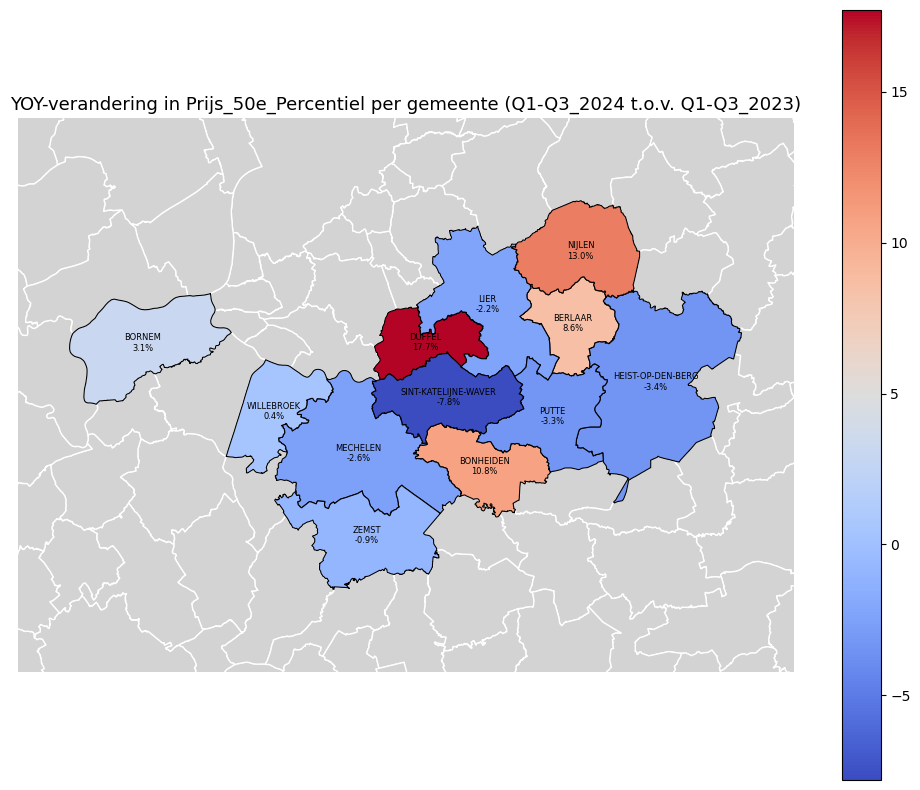

In [60]:
#we vertrekken van dataframe gemeente_yoy_2024_2 die reeds per woningtype de yoy bevat voor alle gemeentes tussen Q1-Q3 2024 en Q1-Q3 2023.
#Deze groeperen tot het gemiddelde over alle woningtypes heen
df_kaart = gemeente_yoy_2024_2.groupby('Naam_NL').agg({'YOY': 'mean'}).reset_index()
#mergen met de geo data
merged_df_kaart = df_kaart.merge(gdf_filtered, on = 'Naam_NL')
#omzetten in de geo dataframe
merged_df_kaart = gpd.GeoDataFrame(merged_df_kaart, geometry='geometry', crs="EPSG:4326")
#nakijken of merged_df_kaart een geo dataframe is 
print(type(merged_df_kaart))

fig, ax = plt.subplots(figsize=(10, 8))

#plot Belgie als achtergrond
gdf.plot(ax=ax, color='lightgrey', edgecolor='white')

#plot de gemeenten
merged_df_kaart.plot(
    column='YOY',
    cmap='coolwarm',
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax
)

#Labels met naam van de gemeenten en de YOY waarde toevoegen
for idx, row in merged_df_kaart.iterrows():
    centroid = row['geometry'].centroid
    tekst = f"{row['Naam_NL']}\n{row['YOY']:.1f}%"
    ax.text(centroid.x, centroid.y, tekst,
            ha='center', va='center', fontsize=6, color='black')

#Door heel belgie te plotten is het gebied dat ik wil bekijken te klein dus ik zoom in op het gekleurde gebied
bounds = merged_df_kaart.total_bounds
ax.set_xlim(bounds[0] - 0.05, bounds[2] + 0.05)
ax.set_ylim(bounds[1] - 0.05, bounds[3] + 0.05)


ax.set_title('YOY-verandering in Prijs_50e_Percentiel per gemeente (Q1-Q3_2024 t.o.v. Q1-Q3_2023)', fontsize=13)
ax.axis('off')
plt.tight_layout()
plt.savefig('plots/kaart YOY-verandering in Prijs_50e_Percentiel per gemeente (Q1-Q3_2024 t.o.v. Q1-Q3_2023).png',dpi=300, bbox_inches='tight')
plt.show()

**Boxplot mediaanprijs per woningtype**

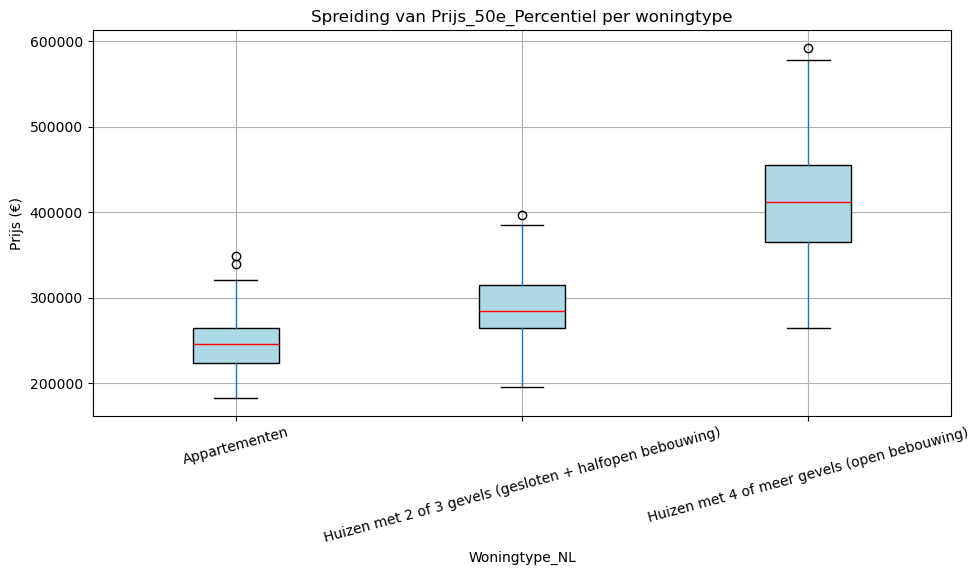

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

df_mechelen_clean.boxplot(
    column='Prijs_50e_Percentiel',
    by='Woningtype_NL',
    ax=ax,
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red')
)

ax.set_title('Spreiding van Prijs_50e_Percentiel per woningtype')
ax.set_ylabel('Prijs (€)')
plt.suptitle('')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()